In [139]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

In [140]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [141]:
#Start with spring and work our way down to winter
season = 1
season_year = 2020
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-03-01 to 2020-05-31
Columns: 388 entries, 10000009 to 22000047
dtypes: float64(388)
memory usage: 279.6 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2020-03-01  2.837452  1.856117  2.571614  2.468621  1.490675  1.360018   
2020-03-02  2.861523  1.629023  1.818002  2.019671  0.955902  0.915789   
2020-03-03  1.912856  1.483684  1.583347  1.859499  1.000944  0.953204   
2020-03-04  2.415190  1.662634  1.864685  2.162803  1.173758  1.096759   
2020-03-05  1.934780  1.566929  1.645554  1.908815  0.990361  0.944413   
...              ...       ...       ...       ...       ...       ...   
2020-05-27  0.785839  0.714134  0.368132  0.885648  0.579870  0.603424   
2020-05-28  0.761423  0.696387  0.359424  0.865843  0.566568  0.592374   
2020-05-29  0.739381  0.683811  0.358118  0.853543  0.549458  0.578160   
2020-05-30  0.722808  0.677053  0.354110  0.840430  0.546046  0.575326   
2020-05-31  0.705617  0.667258  0.351525  0.825897  0.538579  0.569123   

             1000102   1000315  11000011  11000016  ...  67000030   7000003  \
2020-03-01  4.598910  4.103113  

          2020-03-01  2020-03-02  2020-03-03  2020-03-04  2020-03-05  \
10000009   -0.073789   -0.045148   -0.111153   -0.062011   -0.076779   
10000010   -0.143084   -0.134102   -0.142698   -0.118081   -0.105124   
10000011   -0.092561   -0.120462   -0.135373   -0.103027   -0.099065   
10000014   -0.099833   -0.105907   -0.115075   -0.080815   -0.078779   
10000016   -0.168890   -0.182683   -0.178182   -0.154505   -0.149552   
...              ...         ...         ...         ...         ...   
9000172    -0.022403   -0.092128   -0.101192   -0.081965   -0.094490   
9000173     0.098373    0.032568    0.204626    0.288082    0.308909   
9000293     0.000874   -0.021907    0.060671    0.024852    0.013770   
9000451     0.034462    0.054453    0.040070    0.052268    0.056784   
22000047   -0.216359   -0.194882   -0.192245   -0.183365   -0.165617   

          2020-03-06  2020-03-07  2020-03-08  2020-03-09  2020-03-10  ...  \
10000009   -0.090492   -0.090044   -0.087501   -0.080729  

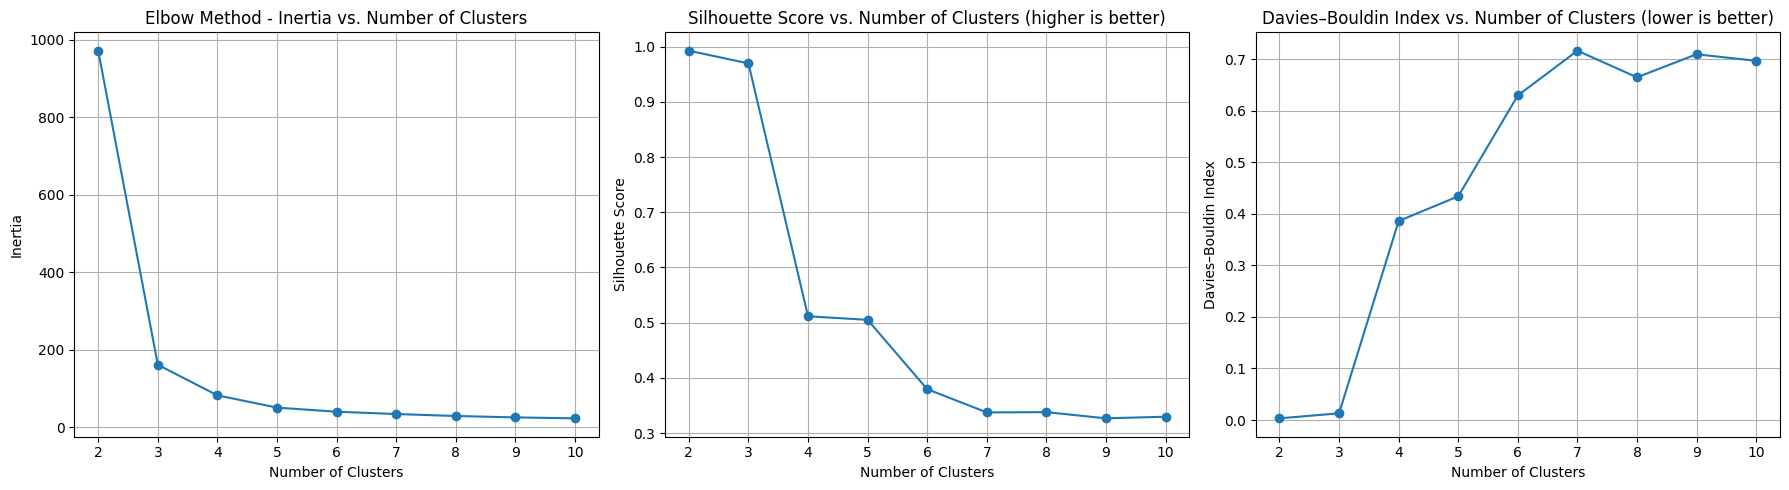

In [142]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np

# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2020-03-01  2.837452  1.856117  2.571614  2.468621  1.490675  1.360018   
2020-03-02  2.861523  1.629023  1.818002  2.019671  0.955902  0.915789   
2020-03-03  1.912856  1.483684  1.583347  1.859499  1.000944  0.953204   
2020-03-04  2.415190  1.662634  1.864685  2.162803  1.173758  1.096759   
2020-03-05  1.934780  1.566929  1.645554  1.908815  0.990361  0.944413   
...              ...       ...       ...       ...       ...       ...   
2020-05-27  0.785839  0.714134  0.368132  0.885648  0.579870  0.603424   
2020-05-28  0.761423  0.696387  0.359424  0.865843  0.566568  0.592374   
2020-05-29  0.739381  0.683811  0.358118  0.853543  0.549458  0.578160   
2020-05-30  0.722808  0.677053  0.354110  0.840430  0.546046  0.575326   
2020-05-31  0.705617  0.667258  0.351525  0.825897  0.538579  0.569123   

             1000102   1000315  11000011  11000016  ...  67000030   7000003  \
2020-03-01  4.598910  4.103113  

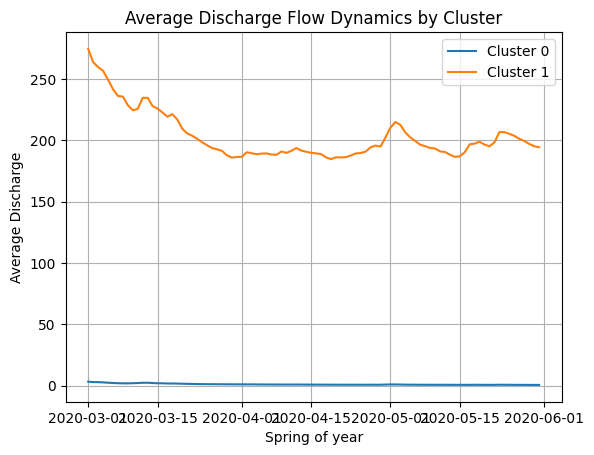

In [143]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [144]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [145]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2020-03-01  2.837452  1.856117  2.571614  2.468621  1.490675  1.360018   
2020-03-02  2.861523  1.629023  1.818002  2.019671  0.955902  0.915789   
2020-03-03  1.912856  1.483684  1.583347  1.859499  1.000944  0.953204   
2020-03-04  2.415190  1.662634  1.864685  2.162803  1.173758  1.096759   
2020-03-05  1.934780  1.566929  1.645554  1.908815  0.990361  0.944413   
...              ...       ...       ...       ...       ...       ...   
2020-05-27  0.785839  0.714134  0.368132  0.885648  0.579870  0.603424   
2020-05-28  0.761423  0.696387  0.359424  0.865843  0.566568  0.592374   
2020-05-29  0.739381  0.683811  0.358118  0.853543  0.549458  0.578160   
2020-05-30  0.722808  0.677053  0.354110  0.840430  0.546046  0.575326   
2020-05-31  0.705617  0.667258  0.351525  0.825897  0.538579  0.569123   

             1000102   1000315  11000011  11000016  ...  67000030   7000003  \
2020-03-01  4.598910  4.103113  3.332631  3.802454  ...  1.167495  3.316077   
2020-03-02  2.331252  2.132009  3.480816  3.422448  ...  1.026813  3.284618   
2020-03-03  1.596368  1.493229  3.569376  3.506479  ...  0.941830  2.982652   
2020-03-04  1.731777  1.610930  3.602583  3.459099  ...  1.173540  2.823774   
2020-03-05  1.376186  1.301841  3.596596  3.197799  ...  0.939780  2.591403   
...              ...       ...       ...       ...  ...       ...       ...   
2020-05-27  0.201623  0.280882  0.727504  0.796107  ...  0.230193  0.333821   
2020-05-28  0.195652  0.275692  0.712233  0.777445  ...  0.207436  0.312180   
2020-05-29  0.190790  0.271466  0.694899  0.767174  ...  0.184755  0.294893   
2020-05-30  0.182950  0.264651  0.684857  0.756628  ...  0.174637  0.279236   
2020-05-31  0.174324  0.257153  0.670778  0.744830  ...  0.199114  0.264957   

             7000333   8000001   9000015   9000172   9000173   9000293  \
2020-03-01  2.561951  3.662452  3.909261  3.565158  5.275535  3.894794   
2020-03-02  1.811817  3.338437  4.378025  2.210586  3.938311  3.183530   
2020-03-03  1.566642  2.863978  4.415948  2.048367  6.208940  4.250476   
2020-03-04  1.715174  2.782761  4.409006  2.147368  7.114042  3.581040   
2020-03-05  1.538648  2.543359  4.253634  1.704935  6.940033  3.109873   
...              ...       ...       ...       ...       ...       ...   
2020-05-27  0.451435  0.474356  1.254527  0.679649  1.786630  0.090868   
2020-05-28  0.428934  0.456087  1.233228  0.656666  1.614298  0.091971   
2020-05-29  0.411342  0.439491  1.203425  0.641385  1.592493  0.085310   
2020-05-30  0.394113  0.426327  1.175628  0.610259  1.713305  0.079987   
2020-05-31  0.375054  0.409223  1.147115  0.603835  1.754944  0.073107   

             9000451  22000047  
2020-03-01  4.370455  0.818437  
2020-03-02  4.241532  0.786887  
2020-03-03  3.970198  0.809613  
2020-03-04  3.949003  0.786408  
2020-03-05  3.668078  0.781889  
...              ...       ...  
2020-05-27  0.273846  0.667040  
2020-05-28  0.260317  0.664128  
2020-05-29  0.250180  0.664959  
2020-05-30  0.240592  0.667826  
2020-05-31  0.232469  0.663634  

[92 rows x 388 columns]

<Axes: >

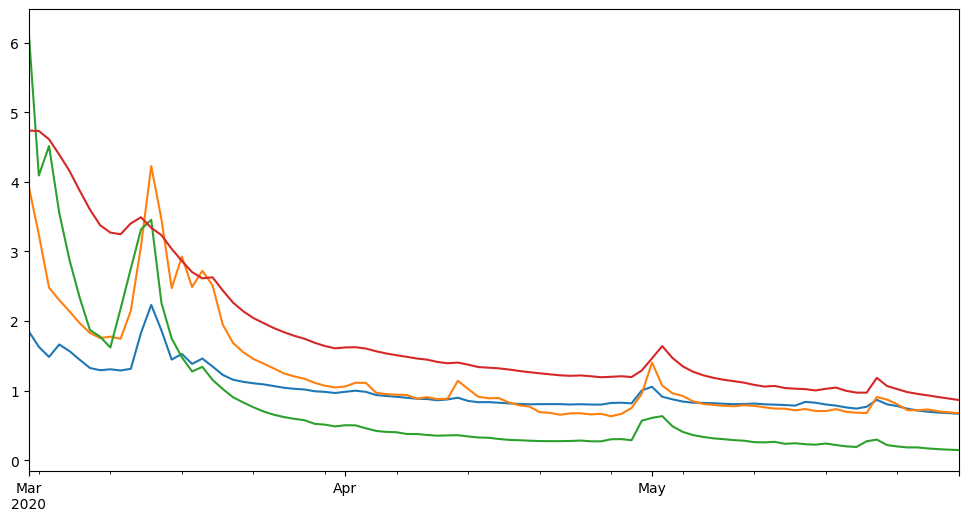

In [146]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

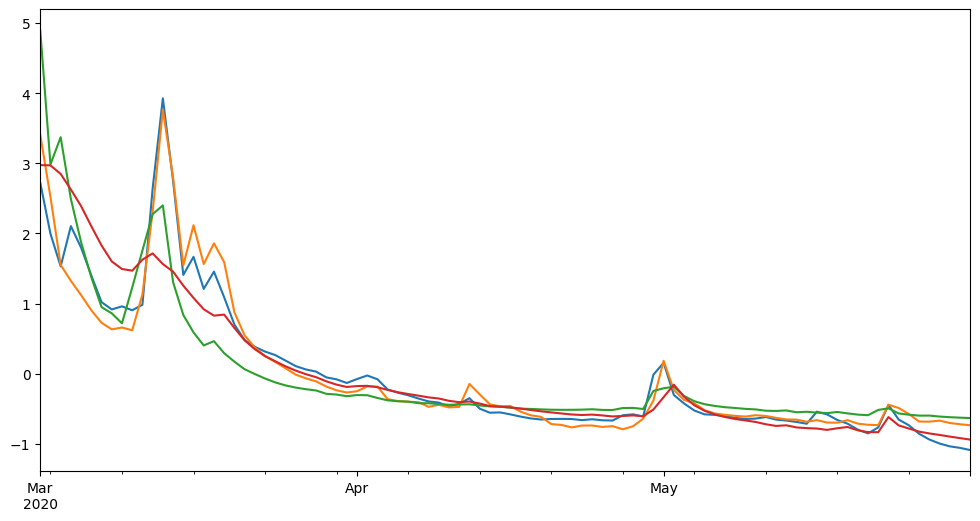

In [147]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

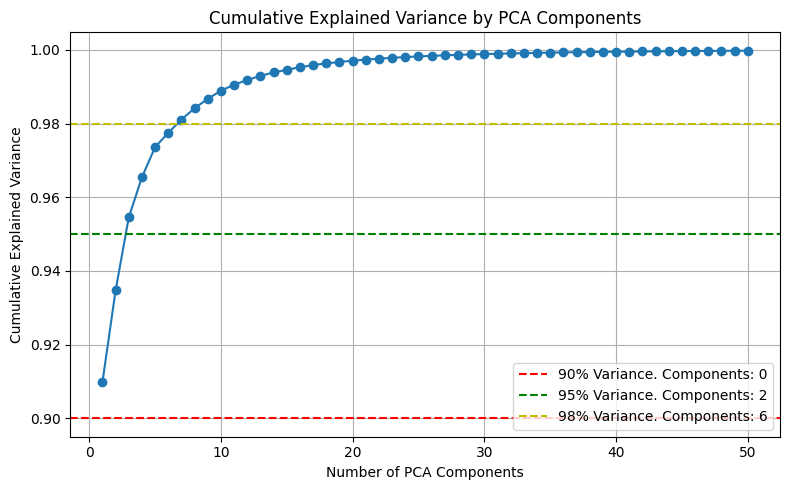

In [148]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [149]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 6.86270895e+01, -1.13310782e+01, -9.04367610e+00, ...,
         3.19832531e-01, -4.29272878e-01, -2.46253483e-02],
       [ 5.47154516e+01, -8.44553524e+00,  3.28390580e-01, ...,
        -3.64129658e-01,  8.72020008e-01, -1.17481001e-01],
       [ 5.22030736e+01, -9.34915542e+00,  5.08035310e-01, ...,
        -6.29584915e-01,  3.89472984e-01,  1.07283117e-01],
       ...,
       [-1.65288457e+01, -2.06361000e+00, -1.43499637e+00, ...,
         1.35080572e-01,  4.83593827e-01,  8.98994597e-02],
       [-1.69057899e+01, -2.10744577e+00, -1.39729478e+00, ...,
         4.62165821e-01,  5.16440889e-01,  1.24472786e-01],
       [-1.72734344e+01, -2.17616143e+00, -1.38121094e+00, ...,
         6.53102277e-01,  5.08464823e-01,  1.42025608e-01]],
      shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_41832\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


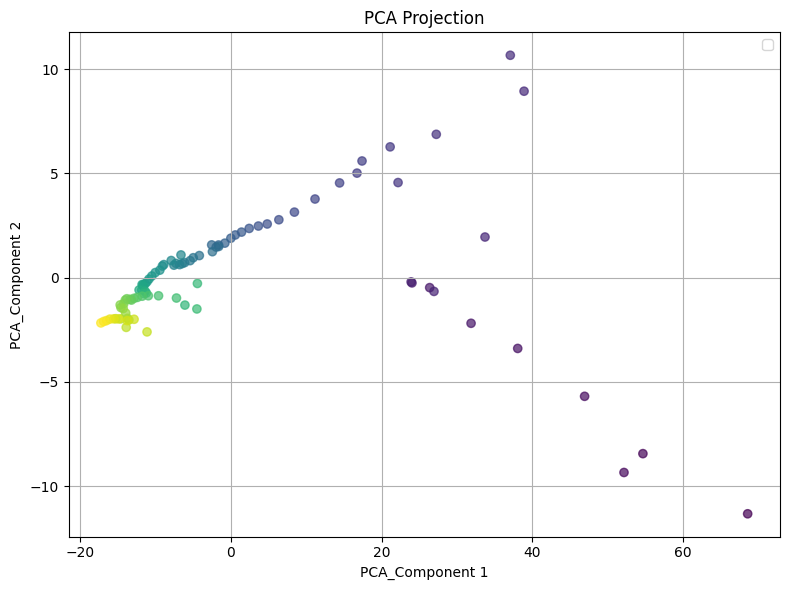

In [150]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_41832\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


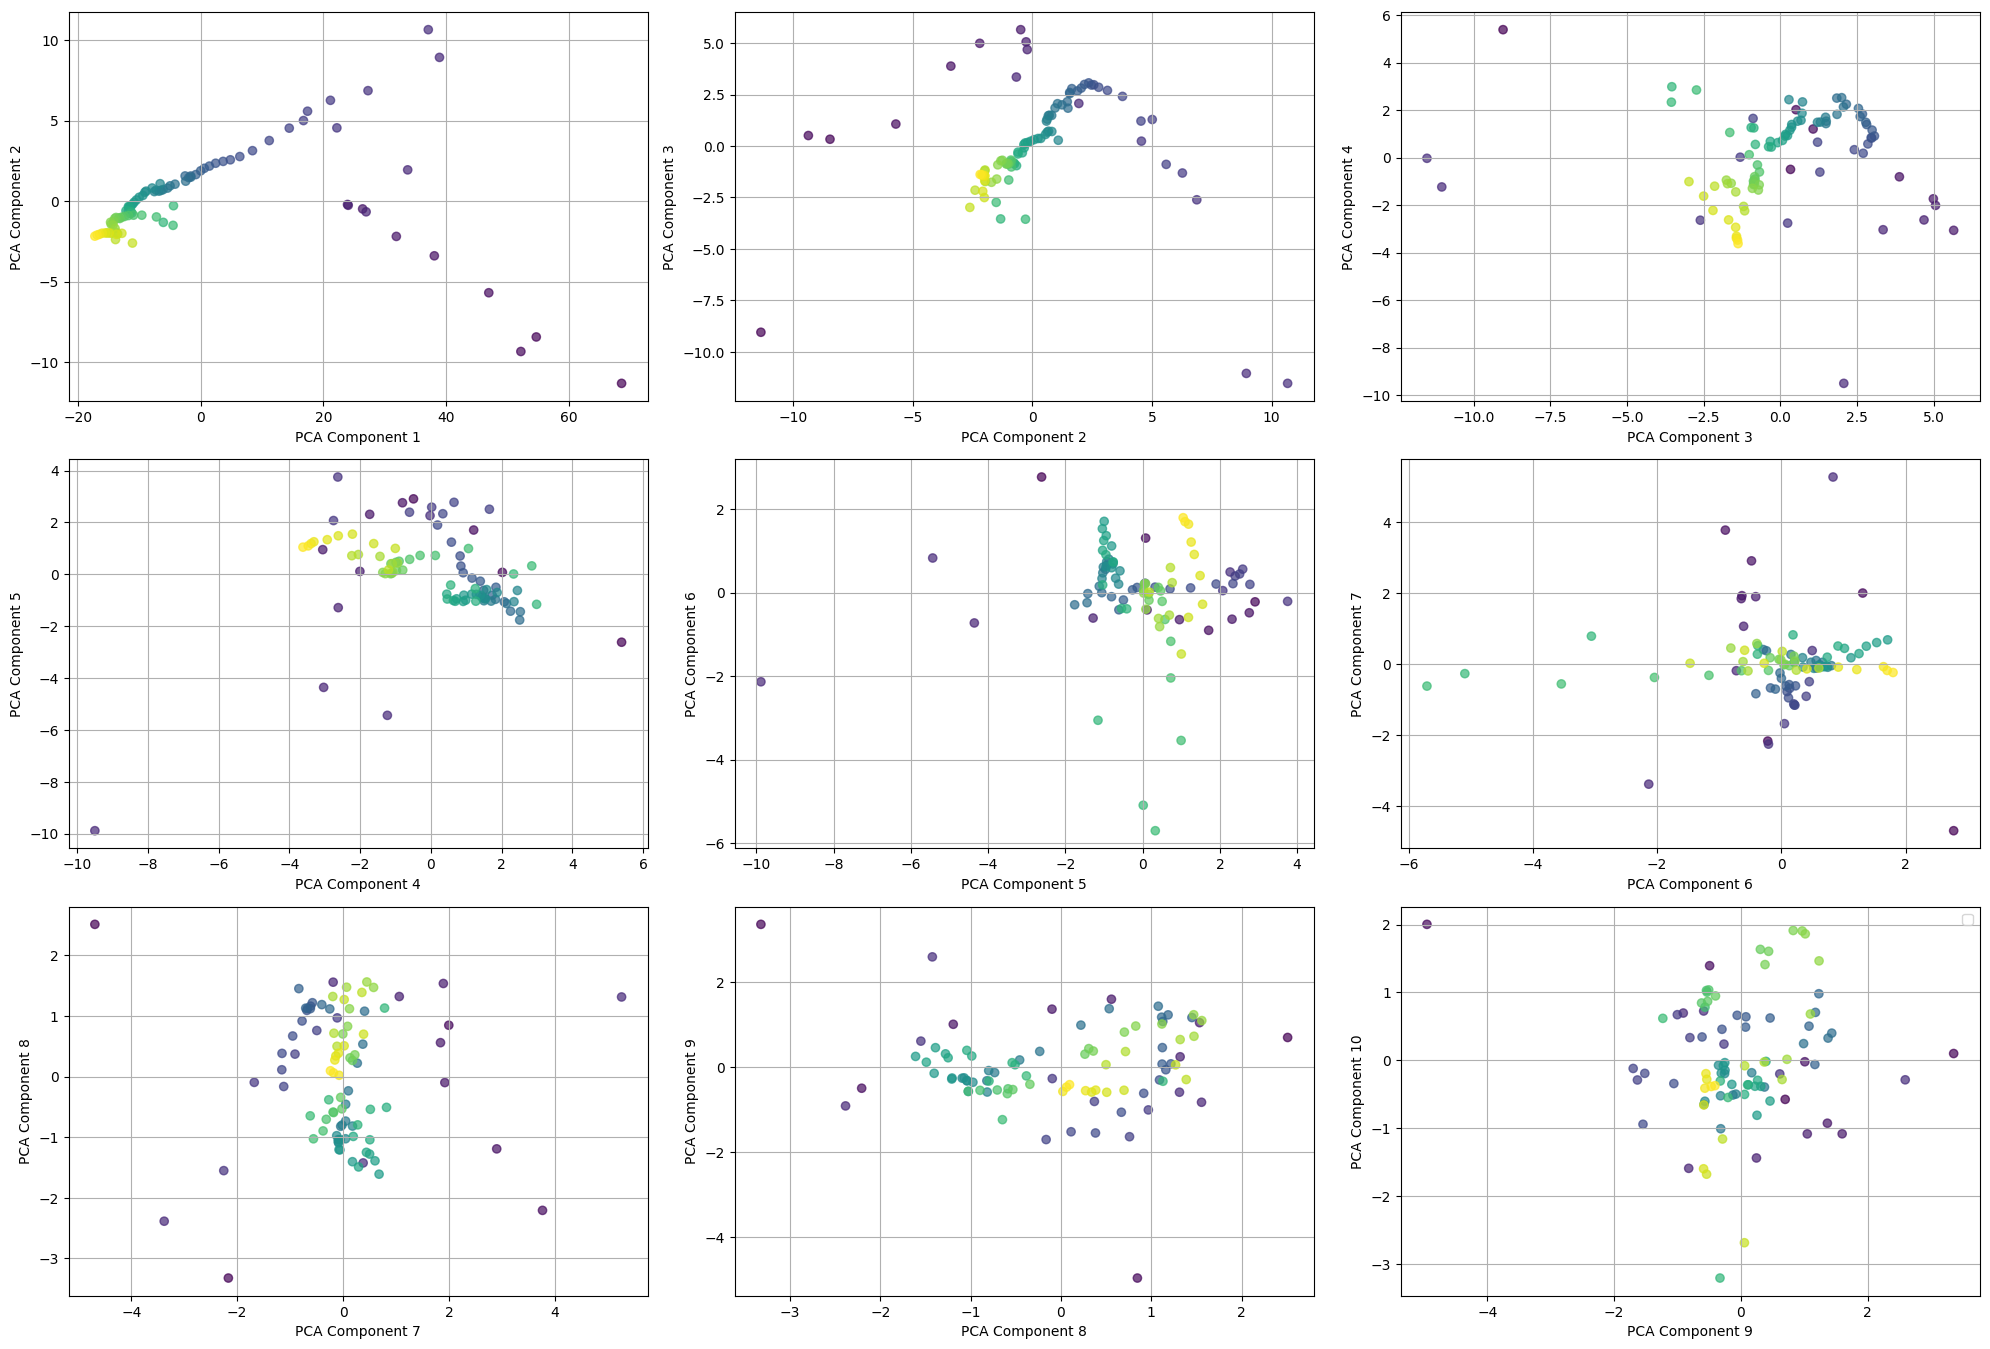

In [151]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [152]:
kmeans = KMeans(n_clusters=4, random_state=42) #chnaged to 2 and has better scores but havent rerun rest
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.476
KMeans Davies-Bouldin Index is 0.730


<Axes: xlabel='k'>

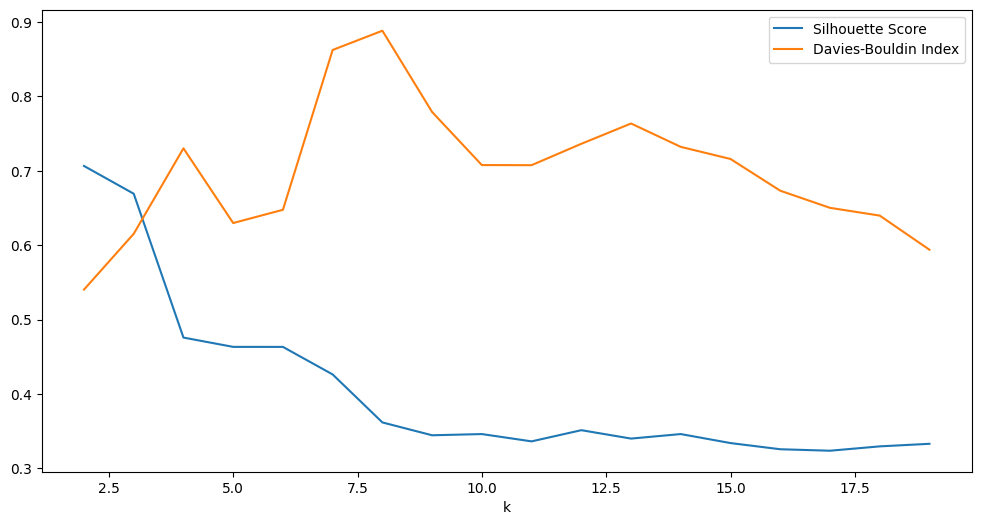

In [153]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         5     75         -0.238996   
2    1.01            3         6     63         -0.107952   
3    1.27            3         8     49         -0.001632   
4    1.52            3         5     40          0.069645   
5    1.78            3         5     32          0.049594   
6    2.03            3         4     29          0.214138   
7    2.29            3         2     26          0.290985   
8    2.54            3         2     25          0.289763   
9    2.80            3         2     25          0.289763   
10   3.05            3         1     25               NaN   
11   3.31            3         1     22               NaN   
12   3.56            3         1     22               NaN   
13   3.82            3         1     20               NaN   
14   4.07            3         1     19               NaN   
15   4.33            3         2     16          0.470980   
16   4.58            3         2     16          0.470980   
17   4.84            3         2     14          0.509275   
18   5.09            3         2     14          0.509275   
19   5.35            3         2     12          0.525429   
20   5.60            3         2     10          0.537926   
21   5.86            3         2     10          0.537926   
22   6.11            3         2     10          0.537926   
23   6.37            3         2     10          0.537926   
24   6.62            3         2     10          0.537926   
25   6.88            3         2      9          0.557930   
26   7.13            3         2      8          0.576267   
27   7.39            3         2      8          0.576267   
28   7.64            3         2      8          0.576267   
29   7.90            3         2      7          0.570038   
30   8.15            3         2      7          0.570038   
31   8.41            3         2      7          0.570038   
32   8.66            3         2      7          0.570038   
33   8.92            3         2      7          0.570038   
34   9.17            3         2      7          0.570038   
35   9.43            3         2      7          0.570038   
36   9.68            3         2      7          0.570038   
37   9.94            3         1      7               NaN   
38  10.19            3         1      7               NaN   
39  10.45            3         1      7               NaN   
40  10.70            3         1      7               NaN   
41  10.96            3         1      6               NaN   
42  11.21            3         1      5               NaN   
43  11.47            3         1      5               NaN   
44  11.72            3         1      5               NaN   
45  11.98            3         1      5               NaN   
46  12.23            3         1      5               NaN   
47  12.49            3         1      4               NaN   
48  12.74            3         1      4               NaN   
49  13.00            3         1      4               NaN   

    Davies-Bouldin Index  
0                    NaN  
1               1.148838  
2               1.144949  
3               1.248418  
4               1.394662  
5               1.120269  
6               0.969200  
7               0.843622  
8               0.848753  
9               0.848753  
10                   NaN  
11                   NaN  
12                   NaN  
13                   NaN  
14                   NaN  
15              1.830251  
16              1.830251  
17              1.258939  
18              1.258939  
19              0.915501  
20              0.848074  
21              0.848074  
22              0.848074  
23              0.848074  
24              0.848074  
25              0.881756  
26              0.992282  
27              0.992282  
28              0.992282  
29              0.872083  
30              0.872083  
31              0.872083  
32 

<Axes: xlabel='eps'>

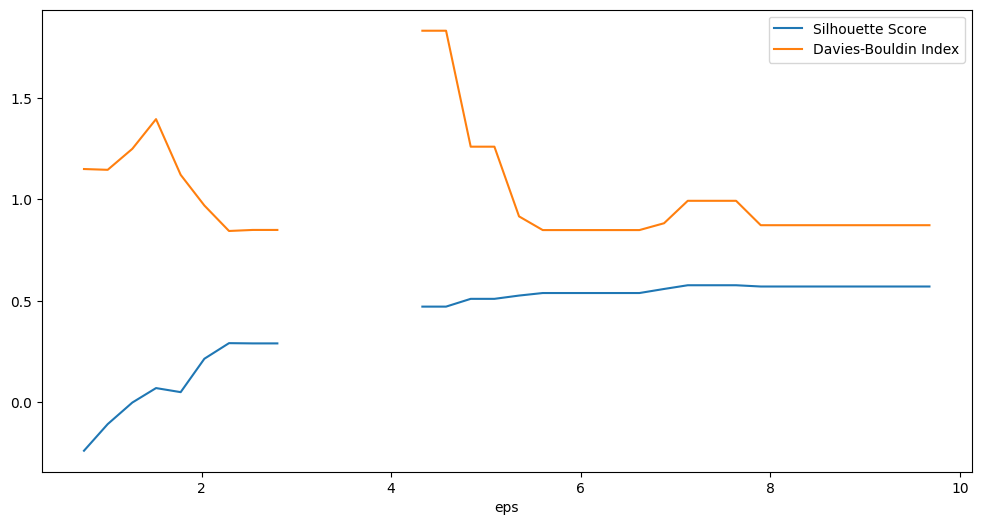

In [154]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

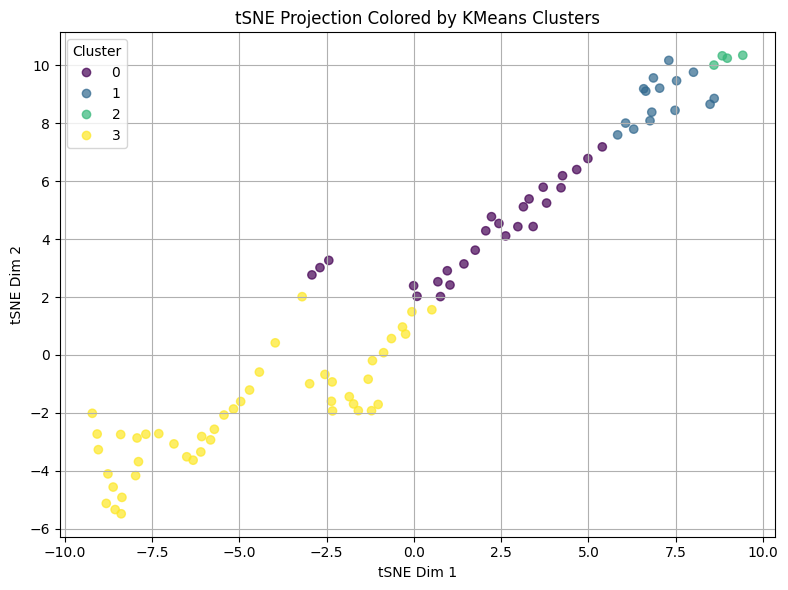

In [155]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        41    257          0.422327   
1    0.05            2        37    234          0.203621   
2    0.06            2        32    217          0.240834   
3    0.06            2        37    198          0.176040   
4    0.07            2        37    178          0.191614   
..    ...          ...       ...    ...               ...   
195  0.98            2         2      4          0.785065   
196  0.99            2         2      4          0.785065   
197  0.99            2         2      4          0.785065   
198  1.00            2         2      4          0.785065   
199  1.00            2         2      4          0.785065   

     Davies-Bouldin Index  
0                0.501544  
1                0.572571  
2                0.532077  
3                0.615070  
4                0.637829  
..                    ...  
195              0.243085  
196              0.243085  
197              0.243085  
198              0.243085  
199              0.243085  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

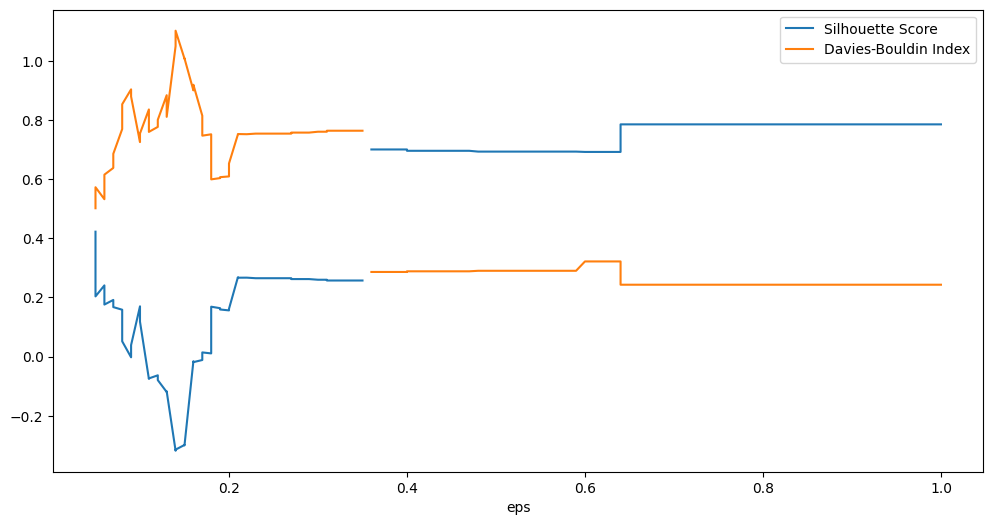

In [156]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Summer (2)

In [157]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [158]:
#Start with spring and work our way down to winter
season = 2
season_year = 2020
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-06-01 to 2020-08-31
Columns: 374 entries, 10000009 to 22000047
dtypes: float64(374)
memory usage: 269.5 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2020-06-01  0.695293  0.659396  0.356025  0.816058  0.523851  0.556888   
2020-06-02  0.691090  0.654551  0.351913  0.864287  0.520786  0.554342   
2020-06-03  0.693149  0.665319  0.356023  0.877035  0.526852  0.559382   
2020-06-04  0.728357  0.660335  0.362622  0.861331  0.535422  0.566500   
2020-06-05  0.940203  0.829758  0.415727  1.071489  0.686267  0.691806   
...              ...       ...       ...       ...       ...       ...   
2020-08-27  1.048512  0.409588  0.192758  0.815235  0.442315  0.489158   
2020-08-28  1.143178  0.436073  0.183053  1.066108  0.437301  0.484992   
2020-08-29  1.017735  0.802809  0.409620  1.306941  1.254295  1.163660   
2020-08-30  0.969998  0.770594  0.205180  0.993681  0.736665  0.733671   
2020-08-31  0.860359  0.515717  0.174351  0.856975  0.542180  0.572115   

             1000102   1000315  11000011  11000016  ...  67000019  67000030  \
2020-06-01  0.169397  0.252870  

          2020-06-01  2020-06-02  2020-06-03  2020-06-04  2020-06-05  \
10000009   -0.032948   -0.032733   -0.032624   -0.036159   -0.038228   
10000010   -0.036530   -0.036372   -0.035319   -0.042349   -0.047493   
10000011   -0.066801   -0.066521   -0.065266   -0.069444   -0.082227   
10000014   -0.020898   -0.015479   -0.014820   -0.024057   -0.027214   
10000016   -0.050055   -0.049698   -0.048726   -0.053718   -0.059531   
...              ...         ...         ...         ...         ...   
9000015     0.009870    0.008655    0.006059   -0.000289   -0.001660   
9000172    -0.044079   -0.043049   -0.043213   -0.045096   -0.052527   
9000293    -0.095178   -0.094502   -0.092719   -0.082279   -0.081781   
9000451    -0.079883   -0.079532   -0.078532   -0.081367   -0.085788   
22000047   -0.034527   -0.034386   -0.035511   -0.037994   -0.056646   

          2020-06-06  2020-06-07  2020-06-08  2020-06-09  2020-06-10  ...  \
10000009   -0.035502   -0.032088   -0.027900   -0.029641  

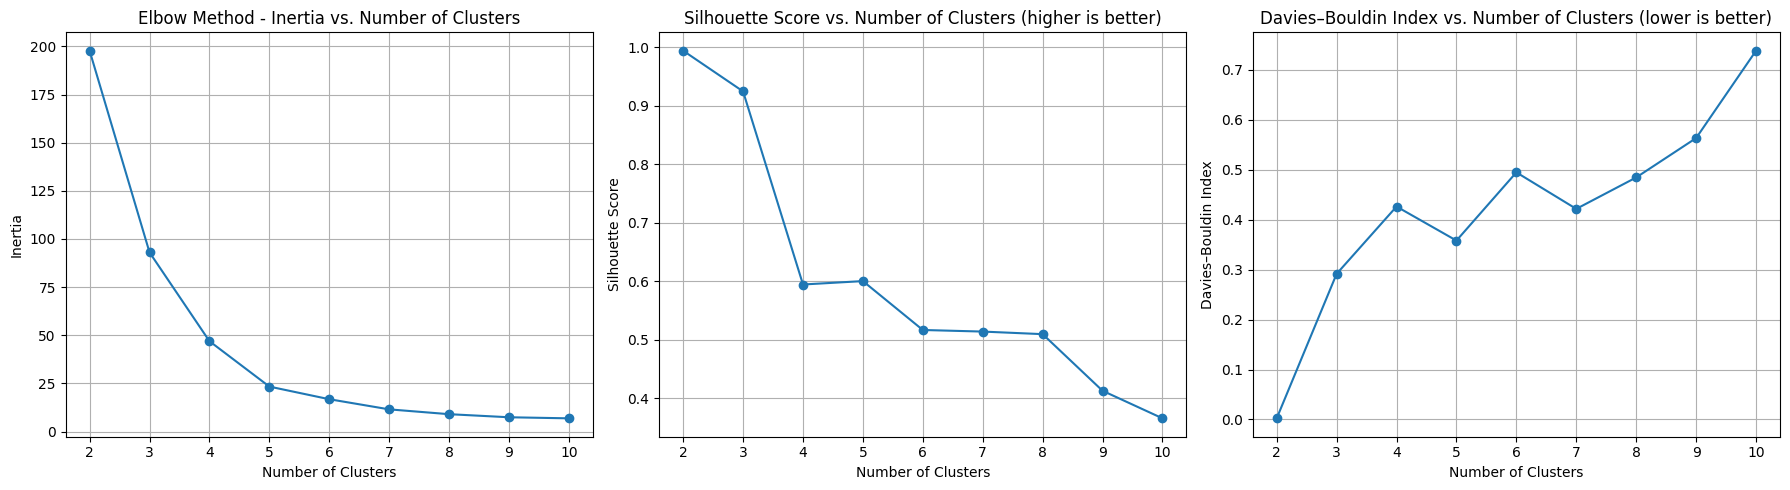

In [159]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2020-06-01  0.695293  0.659396  0.356025  0.816058  0.523851  0.556888   
2020-06-02  0.691090  0.654551  0.351913  0.864287  0.520786  0.554342   
2020-06-03  0.693149  0.665319  0.356023  0.877035  0.526852  0.559382   
2020-06-04  0.728357  0.660335  0.362622  0.861331  0.535422  0.566500   
2020-06-05  0.940203  0.829758  0.415727  1.071489  0.686267  0.691806   
...              ...       ...       ...       ...       ...       ...   
2020-08-27  1.048512  0.409588  0.192758  0.815235  0.442315  0.489158   
2020-08-28  1.143178  0.436073  0.183053  1.066108  0.437301  0.484992   
2020-08-29  1.017735  0.802809  0.409620  1.306941  1.254295  1.163660   
2020-08-30  0.969998  0.770594  0.205180  0.993681  0.736665  0.733671   
2020-08-31  0.860359  0.515717  0.174351  0.856975  0.542180  0.572115   

             1000102   1000315  11000011  11000016  ...  67000019  67000030  \
2020-06-01  0.169397  0.252870  

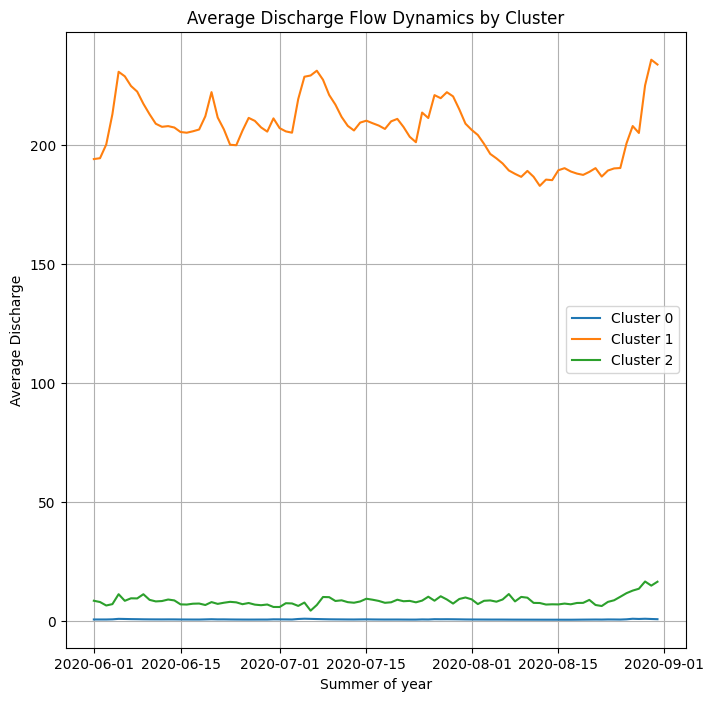

In [160]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [161]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [162]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2020-06-01  0.695293  0.659396  0.356025  0.816058  0.523851  0.556888   
2020-06-02  0.691090  0.654551  0.351913  0.864287  0.520786  0.554342   
2020-06-03  0.693149  0.665319  0.356023  0.877035  0.526852  0.559382   
2020-06-04  0.728357  0.660335  0.362622  0.861331  0.535422  0.566500   
2020-06-05  0.940203  0.829758  0.415727  1.071489  0.686267  0.691806   
...              ...       ...       ...       ...       ...       ...   
2020-08-27  1.048512  0.409588  0.192758  0.815235  0.442315  0.489158   
2020-08-28  1.143178  0.436073  0.183053  1.066108  0.437301  0.484992   
2020-08-29  1.017735  0.802809  0.409620  1.306941  1.254295  1.163660   
2020-08-30  0.969998  0.770594  0.205180  0.993681  0.736665  0.733671   
2020-08-31  0.860359  0.515717  0.174351  0.856975  0.542180  0.572115   

             1000102   1000315  11000011  11000016  ...  67000019  67000030  \
2020-06-01  0.169397  0.252870  0.658435  0.734904  ...  0.008586  0.185788   
2020-06-02  0.155662  0.240932  0.648871  0.731395  ...  0.007115  0.166205   
2020-06-03  0.144417  0.231158  0.637671  0.777425  ...  0.006254  0.149016   
2020-06-04  0.143260  0.230152  0.640696  0.843346  ...  0.006387  0.139408   
2020-06-05  0.228985  0.304666  0.668730  1.018654  ...  0.078214  0.257963   
...              ...       ...       ...       ...  ...       ...       ...   
2020-08-27  0.115786  0.206271  0.559926  0.633287  ...  0.011231  0.029723   
2020-08-28  0.126759  0.215809  0.560534  0.620279  ...  0.015404  0.030067   
2020-08-29  0.236355  0.311072  0.583752  0.753600  ...  0.018094  0.031202   
2020-08-30  0.165248  0.249264  0.601838  0.783431  ...  0.013580  0.030367   
2020-08-31  0.138370  0.225902  0.611185  0.678856  ...  0.011340  0.030794   

             7000003   7000333   8000001   9000015   9000172   9000293  \
2020-06-01  0.250389  0.365098  0.399356  1.124404  0.583741  0.071637   
2020-06-02  0.238104  0.364985  0.391690  1.106553  0.587532  0.071027   
2020-06-03  0.228297  0.353087  0.384283  1.092670  0.583793  0.072490   
2020-06-04  0.220109  0.345905  0.379956  1.122488  0.630154  0.221597   
2020-06-05  0.286272  0.500834  0.503951  1.376092  0.769754  0.421047   
...              ...       ...       ...       ...       ...       ...   
2020-08-27  0.194815  0.272737  0.279385  1.140233  0.589758  0.106853   
2020-08-28  0.212007  0.281841  0.306627  1.138170  0.614390  0.075644   
2020-08-29  0.363591  0.454728  0.577930  1.102112  1.208129  0.067934   
2020-08-30  0.351999  0.454594  0.576878  1.091039  0.794457  0.050930   
2020-08-31  0.275592  0.412355  0.456549  1.056793  0.631972  0.043367   

             9000451  22000047  
2020-06-01  0.224917  0.679470  
2020-06-02  0.221305  0.674496  
2020-06-03  0.219010  0.663335  
2020-06-04  0.231615  0.708194  
2020-06-05  0.373278  0.720652  
...              ...       ...  
2020-08-27  0.139036  0.679634  
2020-08-28  0.142968  0.648049  
2020-08-29  0.145866  0.645682  
2020-08-30  0.143348  0.648699  
2020-08-31  0.133209  0.644039  

[92 rows x 374 columns]

<Axes: >

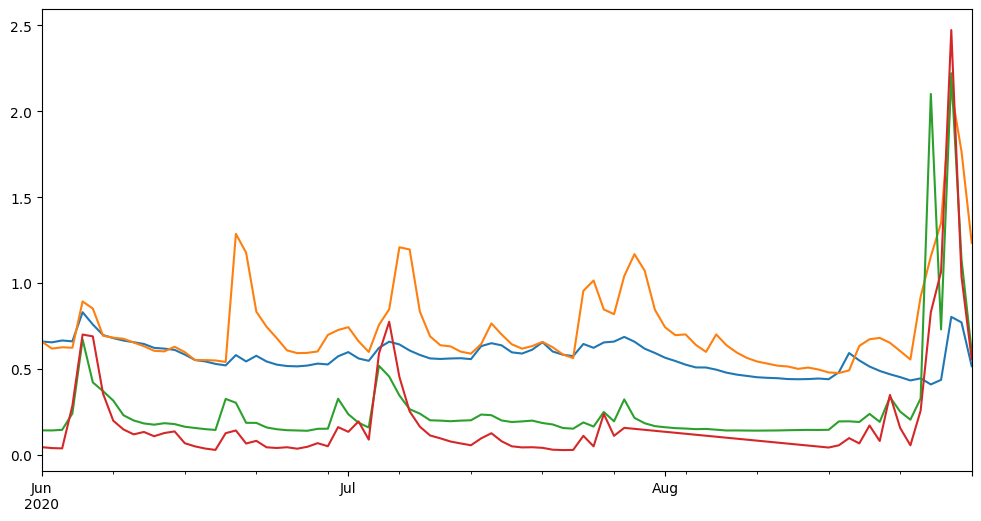

In [163]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

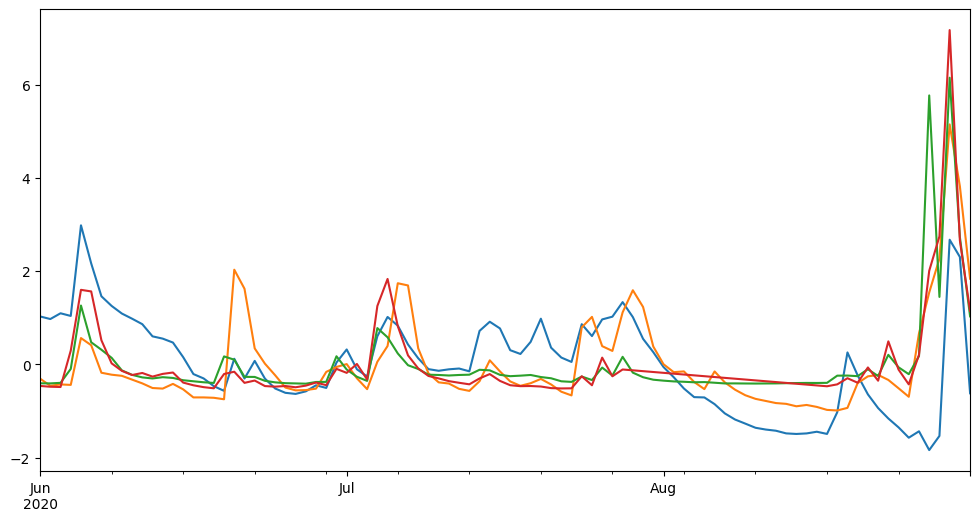

In [164]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

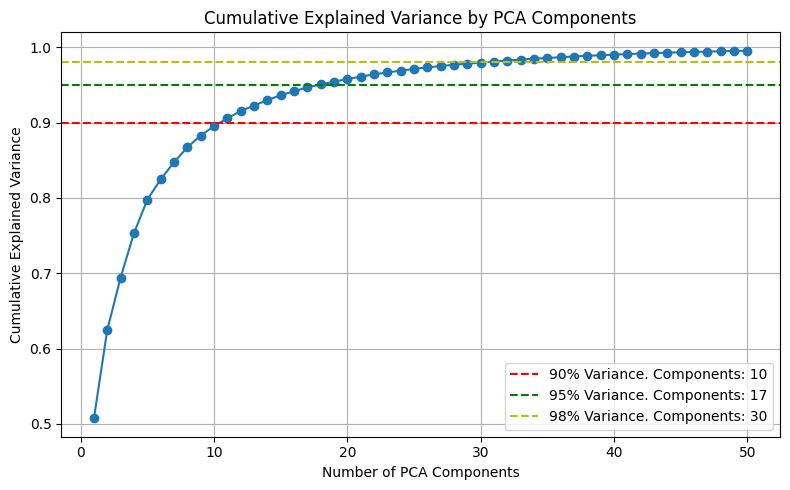

In [165]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [166]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 7.21973974e-01,  6.07220663e+00, -6.23484764e+00, ...,
        -3.38902510e-01,  1.18189370e+00, -5.49036588e-01],
       [-3.37045154e-01,  5.86671900e+00, -6.11480574e+00, ...,
        -3.89597288e-01,  1.01092986e+00, -2.45084712e-01],
       [-6.36427478e-02,  5.88635798e+00, -5.95380702e+00, ...,
        -2.59704889e-01,  8.31689841e-01,  1.68451163e-01],
       ...,
       [ 3.41083728e+01, -2.87135594e+01, -8.67326667e+00, ...,
        -7.26649556e-01,  1.05683902e+00,  1.87137907e-01],
       [ 2.14625620e+01, -1.93629370e+01, -2.69868121e+00, ...,
         1.21022215e-02, -9.77562122e-01, -2.54428101e-01],
       [ 1.03713608e+01, -1.40160441e+01, -1.90198420e+00, ...,
         1.08108225e+00,  8.62628916e-01, -5.31676267e-01]],
      shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_41832\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


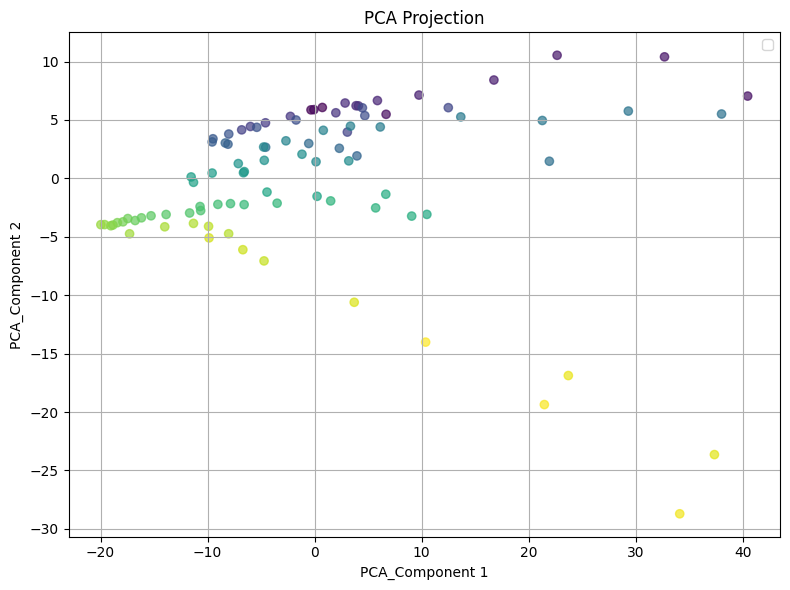

In [167]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_41832\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


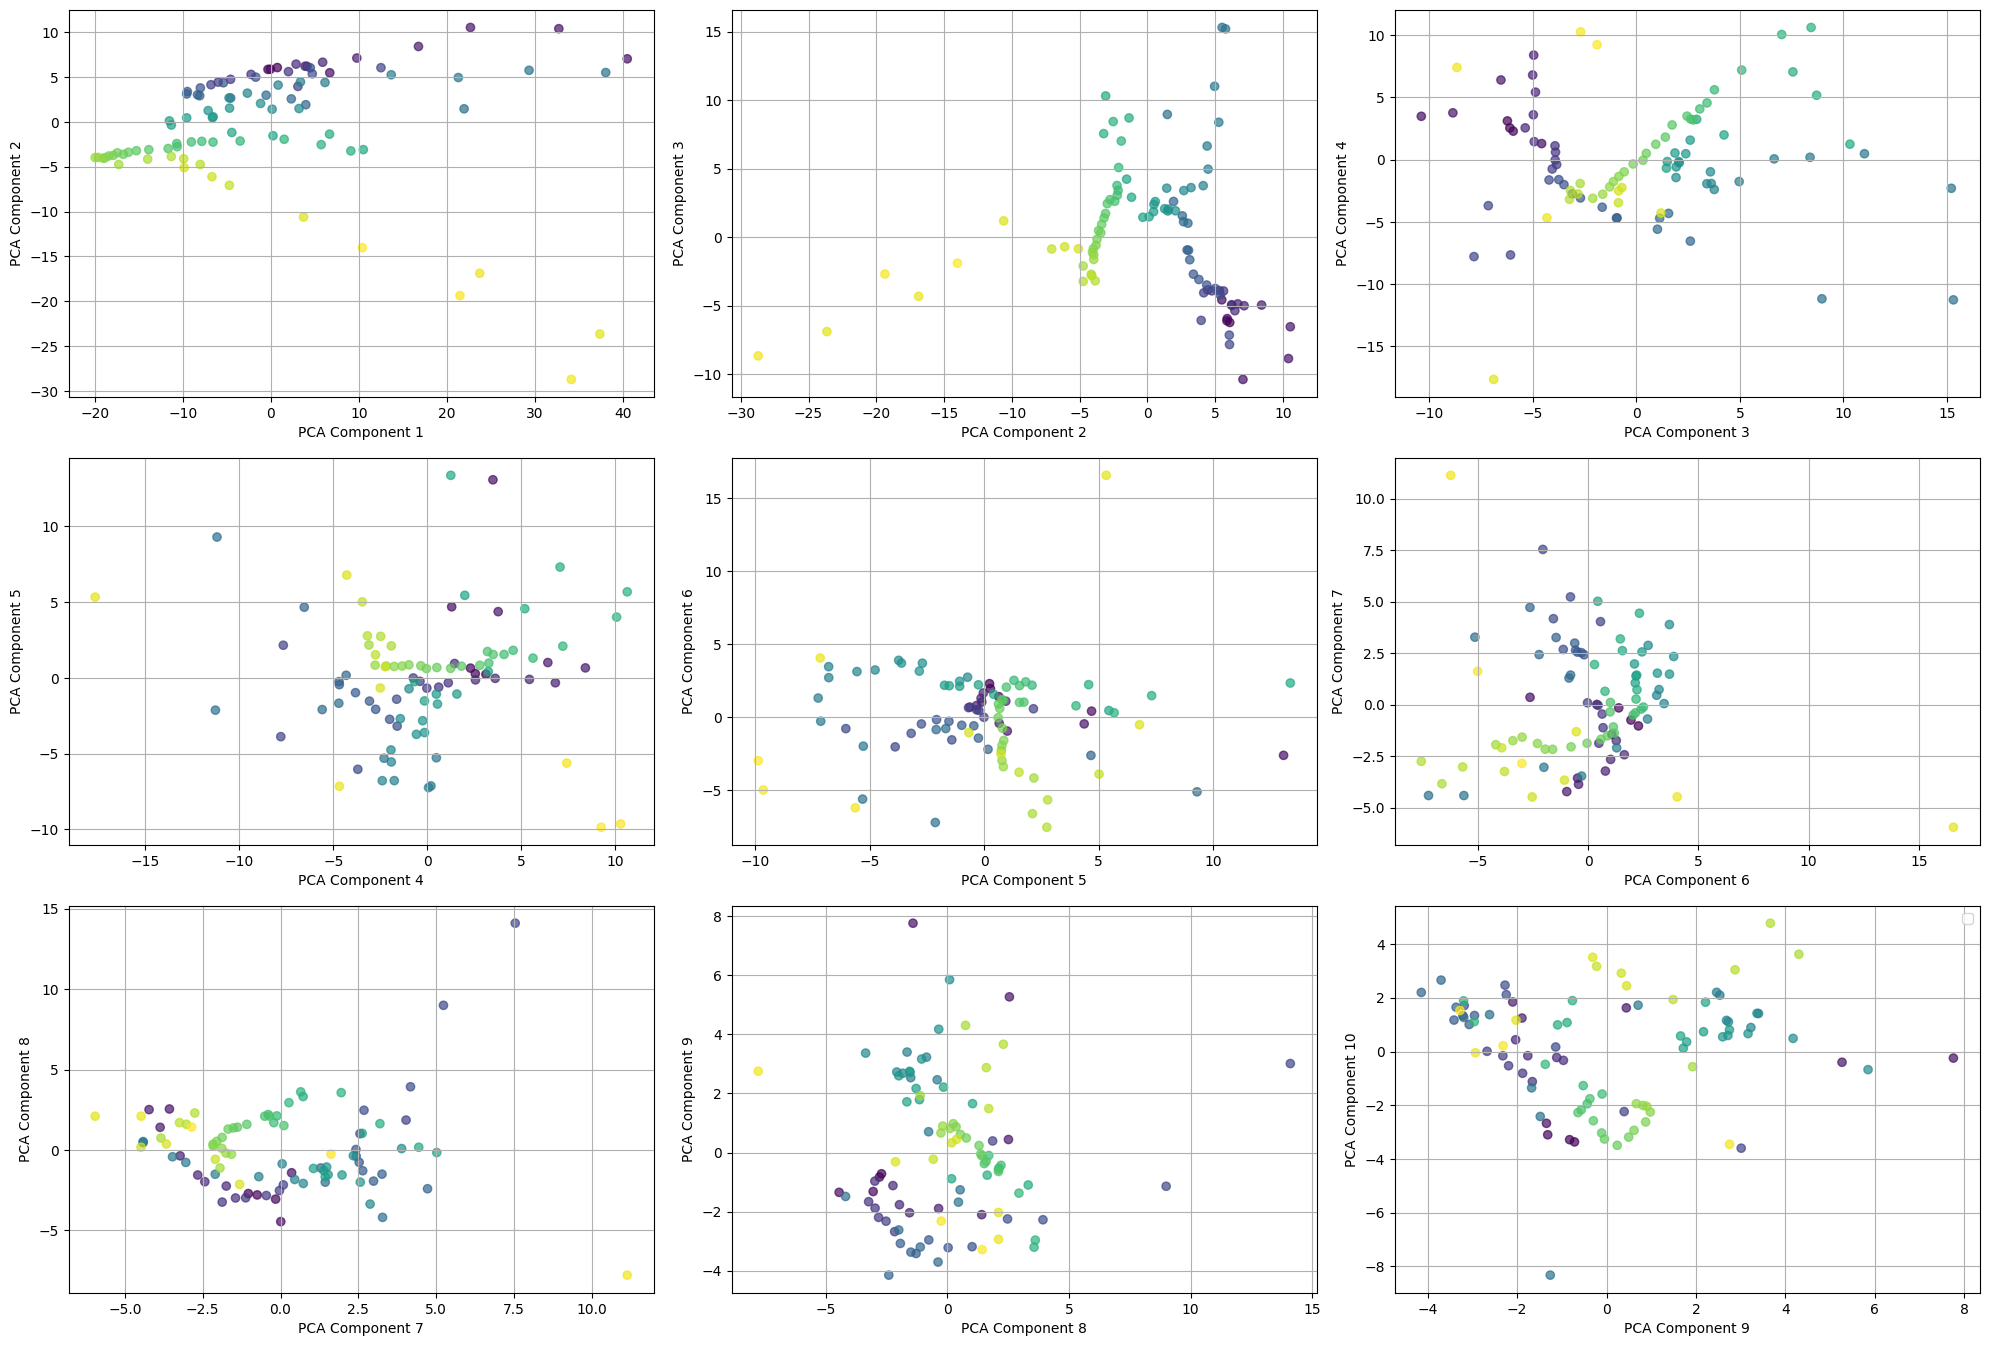

In [168]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [169]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.266
KMeans Davies-Bouldin Index is 1.334


<Axes: xlabel='k'>

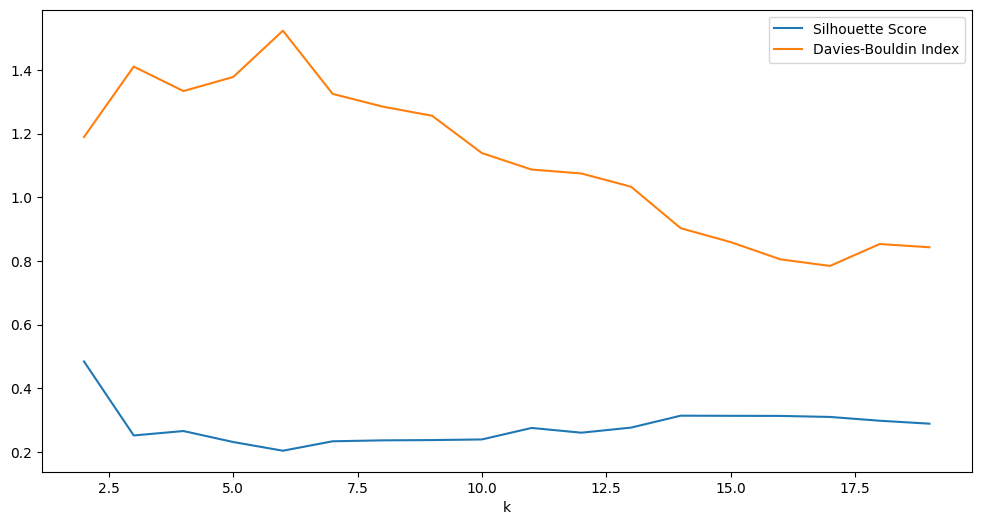

In [170]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         0     92               NaN   
3    1.27            3         1     89               NaN   
4    1.52            3         2     84         -0.013942   
5    1.78            3         3     79         -0.141054   
6    2.03            3         2     78         -0.075415   
7    2.29            3         5     67         -0.079736   
8    2.54            3         6     61         -0.020508   
9    2.80            3         6     60         -0.009644   
10   3.05            3         5     60         -0.051388   
11   3.31            3         7     52         -0.025258   
12   3.56            3         6     52          0.011593   
13   3.82            3         6     52          0.011593   
14   4.07            3         6     49          0.043057   
15   4.33            3         6     44          0.074069   
16   4.58            3         6     44          0.074069   
17   4.84            3         5     41          0.081725   
18   5.09            3         5     41          0.081725   
19   5.35            3         5     39          0.089338   
20   5.60            3         6     36          0.102912   
21   5.86            3         6     36          0.102912   
22   6.11            3         5     35          0.081047   
23   6.37            3         5     31          0.105361   
24   6.62            3         5     27          0.146065   
25   6.88            3         5     27          0.146065   
26   7.13            3         5     27          0.146065   
27   7.39            3         4     24          0.076782   
28   7.64            3         4     23          0.079636   
29   7.90            3         4     21          0.071634   
30   8.15            3         4     20          0.067536   
31   8.41            3         4     18          0.053140   
32   8.66            3         4     18          0.053140   
33   8.92            3         2     17          0.070224   
34   9.17            3         2     16          0.072226   
35   9.43            3         2     15          0.076224   
36   9.68            3         2     14          0.066920   
37   9.94            3         2     14          0.066920   
38  10.19            3         1     14               NaN   
39  10.45            3         1     14               NaN   
40  10.70            3         1     14               NaN   
41  10.96            3         1     14               NaN   
42  11.21            3         1     14               NaN   
43  11.47            3         1     14               NaN   
44  11.72            3         1     14               NaN   
45  11.98            3         1     13               NaN   
46  12.23            3         1     13               NaN   
47  12.49            3         1     13               NaN   
48  12.74            3         1     13               NaN   
49  13.00            3         1     12               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4               0.881249  
5               1.151236  
6               1.274613  
7               1.286635  
8               1.234920  
9               1.260980  
10              1.308897  
11              1.425458  
12              1.458851  
13              1.458851  
14              1.499845  
15              1.525613  
16              1.525613  
17              1.556111  
18              1.556111  
19              1.566485  
20              1.549324  
21              1.549324  
22              1.583609  
23              1.451782  
24              1.344548  
25              1.344548  
26              1.344548  
27              1.460614  
28              1.449500  
29              1.488661  
30              1.497785  
31              1.552560  
32 

<Axes: xlabel='eps'>

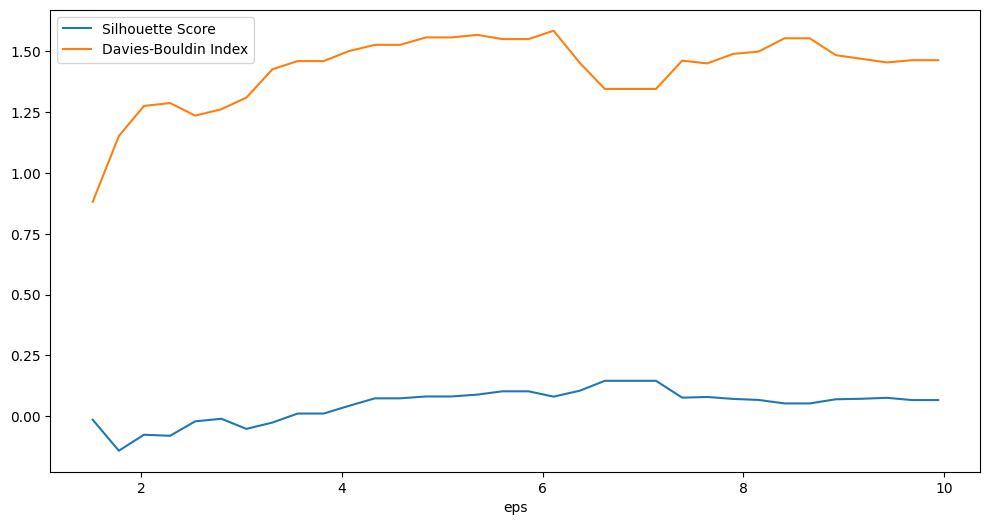

In [171]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

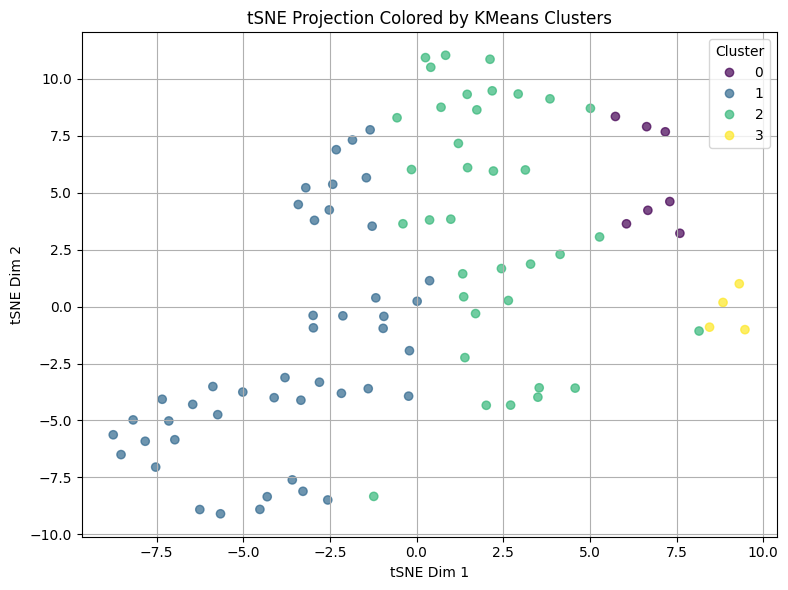

In [172]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  Davies-Bouldin Index
0   0.05            2        22     91          0.246908              0.708001
1   0.07            2         7     58         -0.304603              1.032145
2   0.09            2         7     32         -0.158220              1.094217
3   0.11            2         6     25         -0.104817              0.941058
4   0.13            2         5     17         -0.024633              0.826742
5   0.15            2         5     16         -0.022650              0.880649
6   0.17            2         2     15          0.584301              0.300862
7   0.19            2         2     12          0.589403              0.340680
8   0.21            2         1     11               NaN                   NaN
9   0.22            2         1      9               NaN                   NaN
10  0.24            2         1      9               NaN                   NaN
11  0.26            2         1      9               NaN                   NaN
12  0.28            2         1      8               NaN                   NaN
13  0.30            2         1      8               NaN                   NaN
14  0.32            2         2      5          0.787770              0.243231
15  0.34            2         2      4          0.786158              0.244354
16  0.36            2         2      4          0.786158              0.244354
17  0.38            2         2      4          0.786158              0.244354
18  0.40            2         2      4          0.786158              0.244354
19  0.42            2         2      4          0.786158              0.244354
20  0.44            2         2      4          0.786158              0.244354
21  0.46            2         2      4          0.786158              0.244354
22  0.48            2         2      4          0.786158              0.244354
23  0.50            2         2      4          0.786158              0.244354
24  0.52            2         2      4          0.786158              0.244354
25  0.53            2         2      4          0.786158              0.244354
26  0.55            2         2      4          0.786158              0.244354
27  0.57            2         2      4          0.786158              0.244354
28  0.59            2         2      4          0.786158              0.244354
29  0.61            2         2      4          0.786158              0.244354
30  0.63            2         2      4          0.786158              0.244354
31  0.65            2         2      4          0.786158              0.244354
32  0.67            2         2      4          0.786158              0.244354
33  0.69            2         1      4               NaN                   NaN
34  0.71            2         1      4               NaN                   NaN
35  0.73            2         1      4               NaN                   NaN
36  0.75            2         1      4               NaN                   NaN
37  0.77            2         1      3               NaN                   NaN
38  0.79            2         1      3               NaN                   NaN
39  0.81            2         1      3               NaN                   NaN
40  0.83            2         1      3               NaN                   NaN
41  0.84            2         1      3               NaN                   NaN
42  0.86            2         1      3               NaN                   NaN
43  0.88            2         1      3               NaN                   NaN
44  0.90            2         1      3               NaN                   NaN
45  0.92            2         1      3               NaN                   NaN
46  0.94            2         1      3               NaN                   NaN
47  0.96            2         1      3               NaN                   NaN
48  0.98            2         1      3               NaN                   NaN
49  1.00            2         1      3               Na

<Axes: xlabel='eps'>

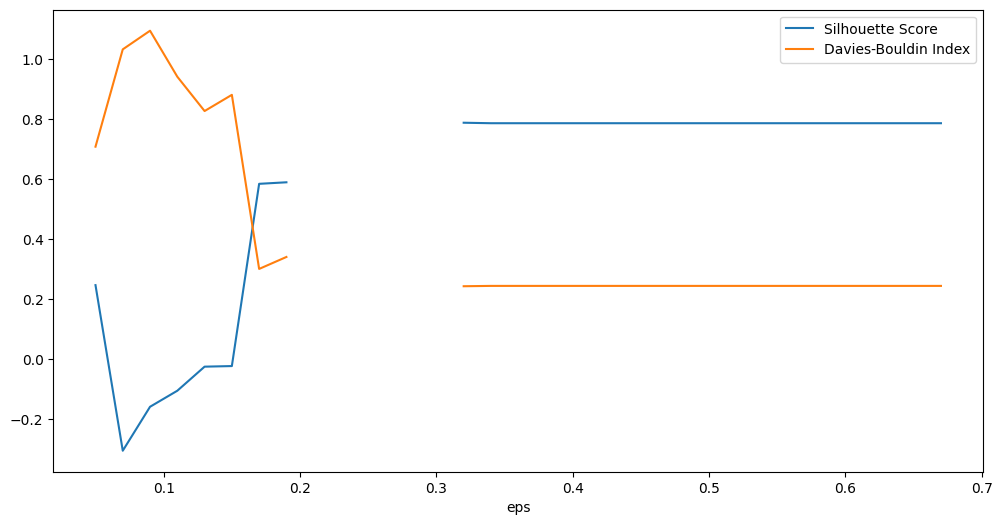

In [173]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 50)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [174]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [175]:
#Start with spring and work our way down to winter
season = 3
season_year = 2020
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2020-09-01 to 2020-11-30
Columns: 381 entries, 10000009 to 22000047
dtypes: float64(381)
memory usage: 271.6 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2020-09-01  0.771205  0.456446  0.162173  0.797201  0.481349  0.521583   
2020-09-02  0.728916  0.437516  0.158140  0.767195  0.456952  0.501316   
2020-09-03  0.709519  0.430509  0.156659  0.753970  0.450253  0.495752   
2020-09-04  0.710757  0.448801  0.155498  0.751796  0.447309  0.493306   
2020-09-05  0.715242  0.470234  0.161269  0.752947  0.469081  0.511392   
...              ...       ...       ...       ...       ...       ...   
2020-11-26  1.136141  0.728602  0.310260  1.088912  0.658564  0.668793   
2020-11-27  1.026332  0.674647  0.279972  1.007907  0.621254  0.637800   
2020-11-28  0.962578  0.648481  0.264185  0.957737  0.592606  0.614002   
2020-11-29  0.938993  0.644634  0.262965  0.936590  0.587899  0.610092   
2020-11-30  0.932793  0.646760  0.261679  0.932313  0.589693  0.611583   

             1000102   1000315  11000011  11000016  ...  67000019  67000030  \
2020-09-01  0.122571  0.212168  

          2020-09-01  2020-09-02  2020-09-03  2020-09-04  2020-09-05  \
10000009   -0.034805   -0.034355   -0.034085   -0.031398   -0.033823   
10000010   -0.062187   -0.060632   -0.059828   -0.056251   -0.057218   
10000011   -0.087786   -0.085824   -0.085095   -0.084078   -0.086721   
10000014   -0.032544   -0.030903   -0.029983   -0.027505   -0.030222   
10000016   -0.060021   -0.058879   -0.058006   -0.056393   -0.057328   
...              ...         ...         ...         ...         ...   
9000015    -0.012170   -0.008875   -0.008267   -0.006198   -0.007789   
9000172    -0.051986   -0.046112   -0.035849   -0.029713   -0.028340   
9000293    -0.098402   -0.096412   -0.094279   -0.093701   -0.094548   
9000451    -0.091161   -0.089604   -0.088782   -0.087859   -0.090976   
22000047   -0.046610   -0.042992   -0.041246   -0.038674   -0.039972   

          2020-09-06  2020-09-07  2020-09-08  2020-09-09  2020-09-10  ...  \
10000009   -0.034849   -0.036716   -0.035738   -0.036441  

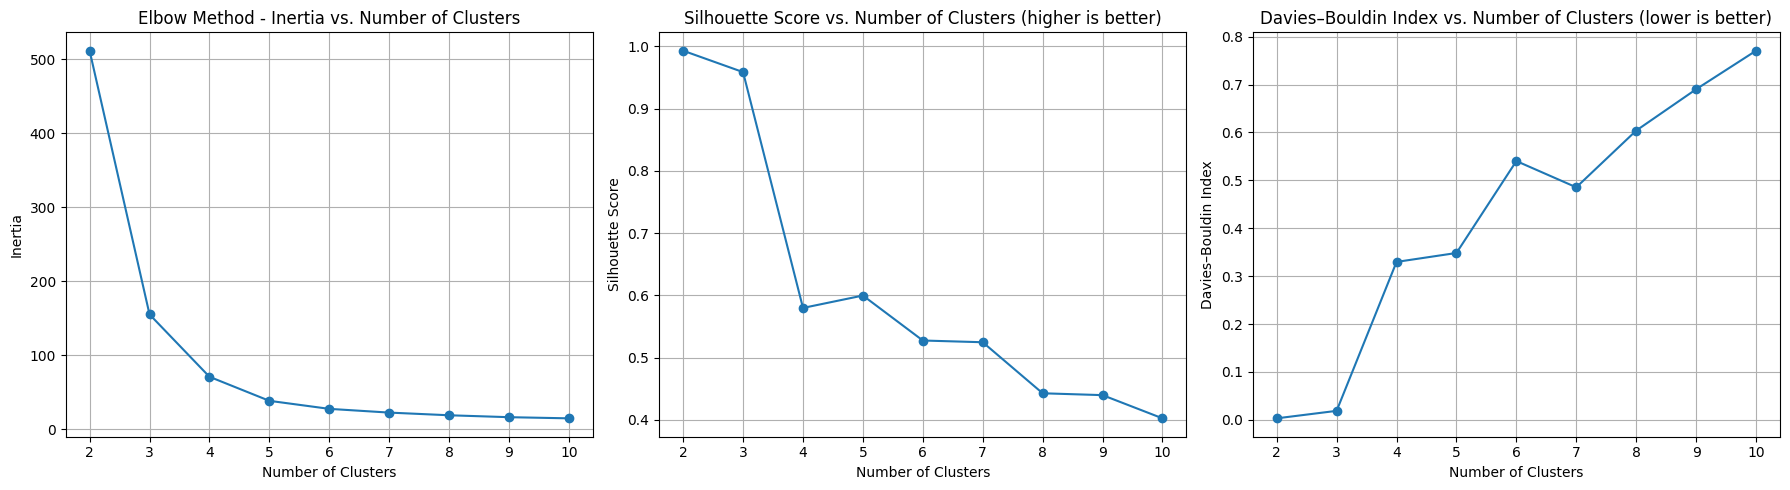

In [176]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2020-09-01  0.771205  0.456446  0.162173  0.797201  0.481349  0.521583   
2020-09-02  0.728916  0.437516  0.158140  0.767195  0.456952  0.501316   
2020-09-03  0.709519  0.430509  0.156659  0.753970  0.450253  0.495752   
2020-09-04  0.710757  0.448801  0.155498  0.751796  0.447309  0.493306   
2020-09-05  0.715242  0.470234  0.161269  0.752947  0.469081  0.511392   
...              ...       ...       ...       ...       ...       ...   
2020-11-26  1.136141  0.728602  0.310260  1.088912  0.658564  0.668793   
2020-11-27  1.026332  0.674647  0.279972  1.007907  0.621254  0.637800   
2020-11-28  0.962578  0.648481  0.264185  0.957737  0.592606  0.614002   
2020-11-29  0.938993  0.644634  0.262965  0.936590  0.587899  0.610092   
2020-11-30  0.932793  0.646760  0.261679  0.932313  0.589693  0.611583   

             1000102   1000315  11000011  11000016  ...  67000019  67000030  \
2020-09-01  0.122571  0.212168  

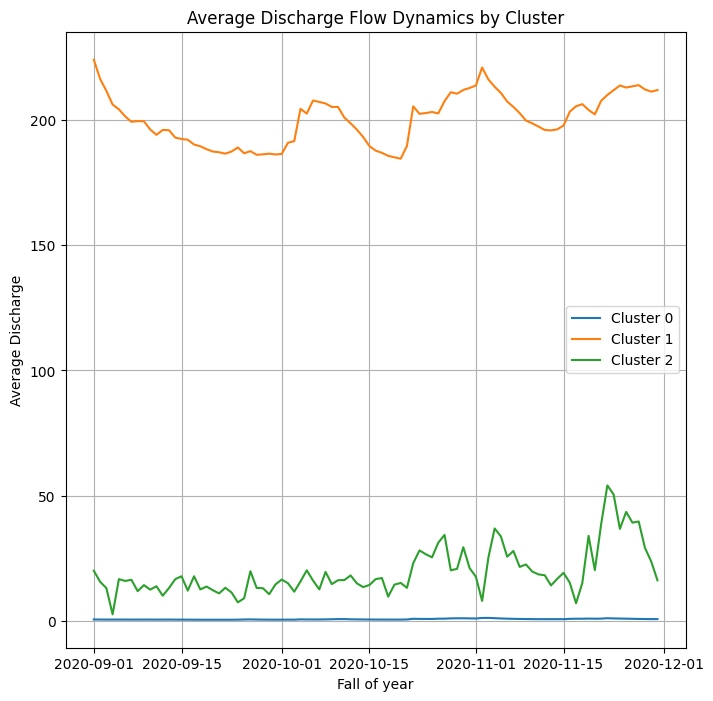

In [177]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [178]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [179]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2020-09-01  0.771205  0.456446  0.162173  0.797201  0.481349  0.521583   
2020-09-02  0.728916  0.437516  0.158140  0.767195  0.456952  0.501316   
2020-09-03  0.709519  0.430509  0.156659  0.753970  0.450253  0.495752   
2020-09-04  0.710757  0.448801  0.155498  0.751796  0.447309  0.493306   
2020-09-05  0.715242  0.470234  0.161269  0.752947  0.469081  0.511392   
...              ...       ...       ...       ...       ...       ...   
2020-11-26  1.136141  0.728602  0.310260  1.088912  0.658564  0.668793   
2020-11-27  1.026332  0.674647  0.279972  1.007907  0.621254  0.637800   
2020-11-28  0.962578  0.648481  0.264185  0.957737  0.592606  0.614002   
2020-11-29  0.938993  0.644634  0.262965  0.936590  0.587899  0.610092   
2020-11-30  0.932793  0.646760  0.261679  0.932313  0.589693  0.611583   

             1000102   1000315  11000011  11000016  ...  67000019  67000030  \
2020-09-01  0.122571  0.212168  0.612408  0.624939  ...  0.009718  0.031387   
2020-09-02  0.025105  0.127449  0.607277  0.596701  ...  0.011386  0.029825   
2020-09-03  0.112321  0.203259  0.599130  0.580823  ...  0.012772  0.031056   
2020-09-04  0.114356  0.205028  0.592756  0.578074  ...  0.010524  0.030452   
2020-09-05  0.140339  0.227613  0.593146  0.574422  ...  0.016542  0.031037   
...              ...       ...       ...       ...  ...       ...       ...   
2020-11-26  1.284415  1.222072  1.972941  2.015848  ...  0.776962  0.186393   
2020-11-27  1.052315  1.020325  1.947043  1.718514  ...  0.745457  0.169348   
2020-11-28  0.910609  0.897151  1.902869  1.525228  ...  0.695406  0.154428   
2020-11-29  0.839377  0.835234  1.849538  1.402512  ...  0.687984  0.165308   
2020-11-30  0.824032  0.821895  1.792367  1.330920  ...  0.688282  0.194313   

             7000003   7000333   8000001   9000015   9000172   9000293  \
2020-09-01  0.240718  0.399878  0.394809  1.031406  0.573704  0.040145   
2020-09-02  0.224236  0.339856  0.362400  1.011480  0.598539  0.040721   
2020-09-03  0.219549  0.320256  0.348378  0.989336  0.690397  0.057122   
2020-09-04  0.227194  0.325647  0.355341  0.976371  0.728521  0.054075   
2020-09-05  0.238653  0.318575  0.347047  0.987878  0.772655  0.079297   
...              ...       ...       ...       ...       ...       ...   
2020-11-26  1.081032  0.690346  1.152567  2.112604  1.478470  1.696854   
2020-11-27  0.867334  0.635104  1.024233  1.787203  1.177399  1.431190   
2020-11-28  0.742768  0.594178  0.917272  1.568359  1.064259  1.208877   
2020-11-29  0.683831  0.580979  0.861922  1.467173  1.066855  1.100068   
2020-11-30  0.668446  0.589273  0.849412  1.455578  1.141631  1.102663   

             9000451  22000047  
2020-09-01  0.123375  0.635510  
2020-09-02  0.116222  0.633131  
2020-09-03  0.116700  0.631910  
2020-09-04  0.115653  0.634069  
2020-09-05  0.116712  0.650844  
...              ...       ...  
2020-11-26  1.307257  0.582004  
2020-11-27  1.099273  0.569331  
2020-11-28  0.940134  0.562538  
2020-11-29  0.857350  0.562127  
2020-11-30  0.825038  0.563792  

[91 rows x 381 columns]

<Axes: >

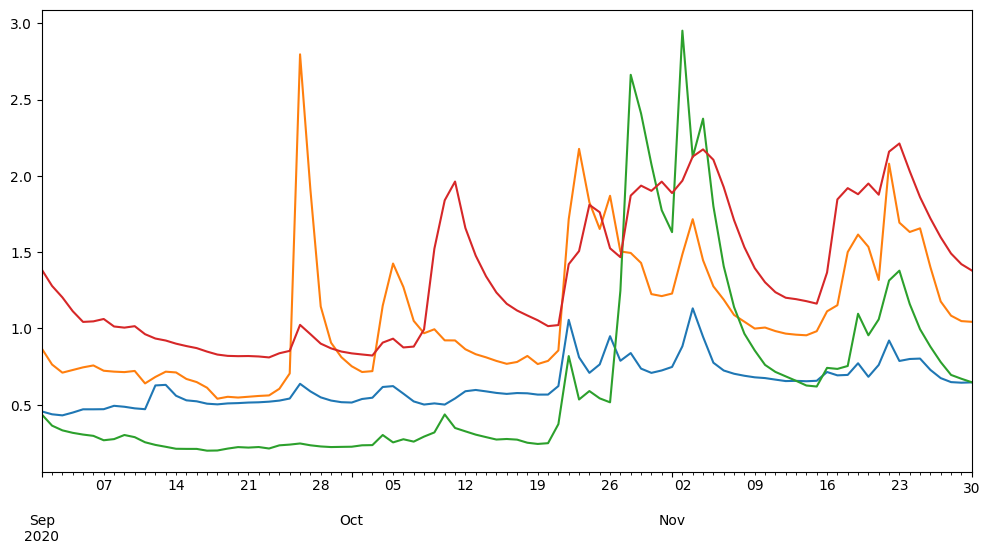

In [180]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

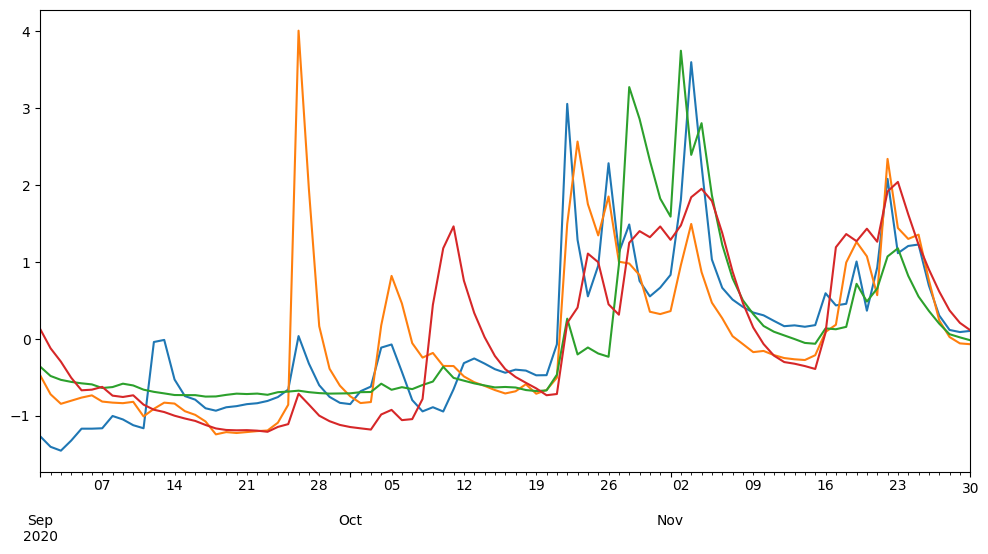

In [181]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

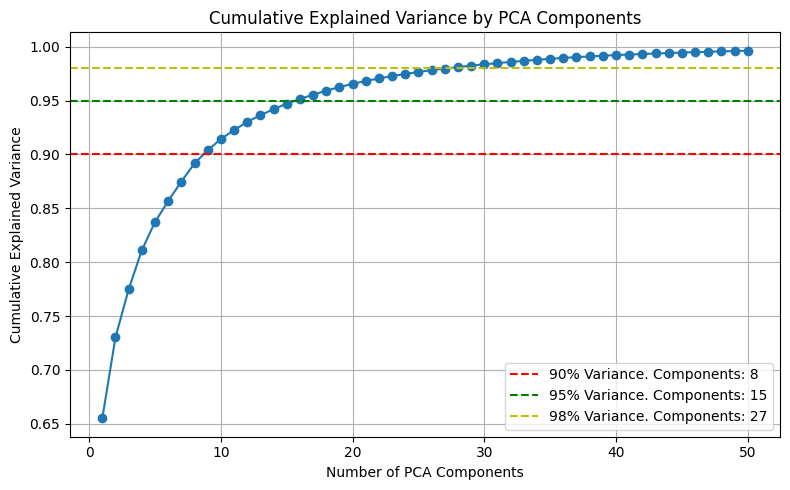

In [182]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [183]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ -8.76604064,   0.68042935,  -6.59900814, ...,  -1.54624382,
         -0.4627825 ,  -0.2974371 ],
       [-11.57425205,   1.61822464,  -6.04680907, ...,  -2.14499126,
         -0.14627382,  -1.69335478],
       [-12.44056734,   1.74416921,  -6.47153313, ...,  -1.26053744,
         -0.12341401,   0.20083523],
       ...,
       [  6.76271114,   8.34983953,   4.44522544, ...,  -0.58812391,
         -0.46100727,  -0.58769133],
       [  5.11565247,   8.3402427 ,   4.06927581, ...,  -0.75405037,
         -0.64138773,  -0.99526262],
       [  5.54214953,   8.20584715,   3.75998908, ...,  -0.69893931,
         -0.11816131,  -0.35989527]], shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_41832\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


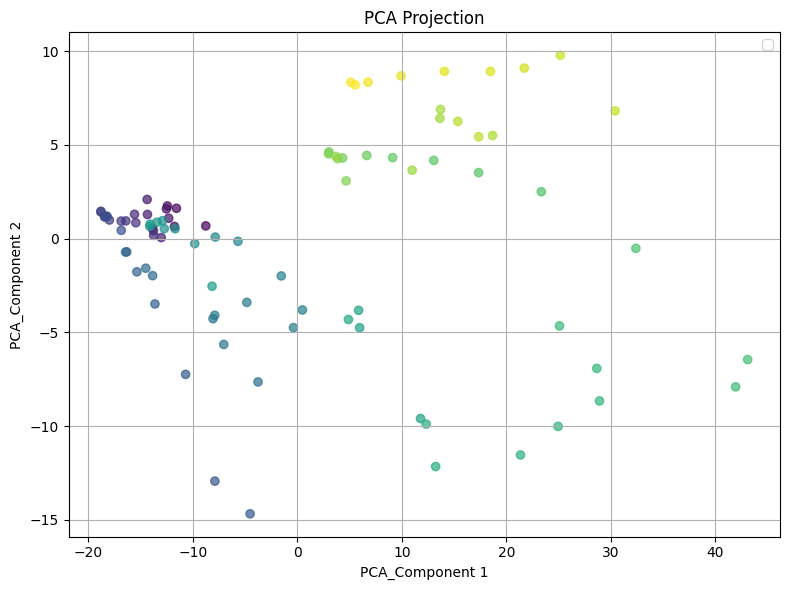

In [184]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_41832\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


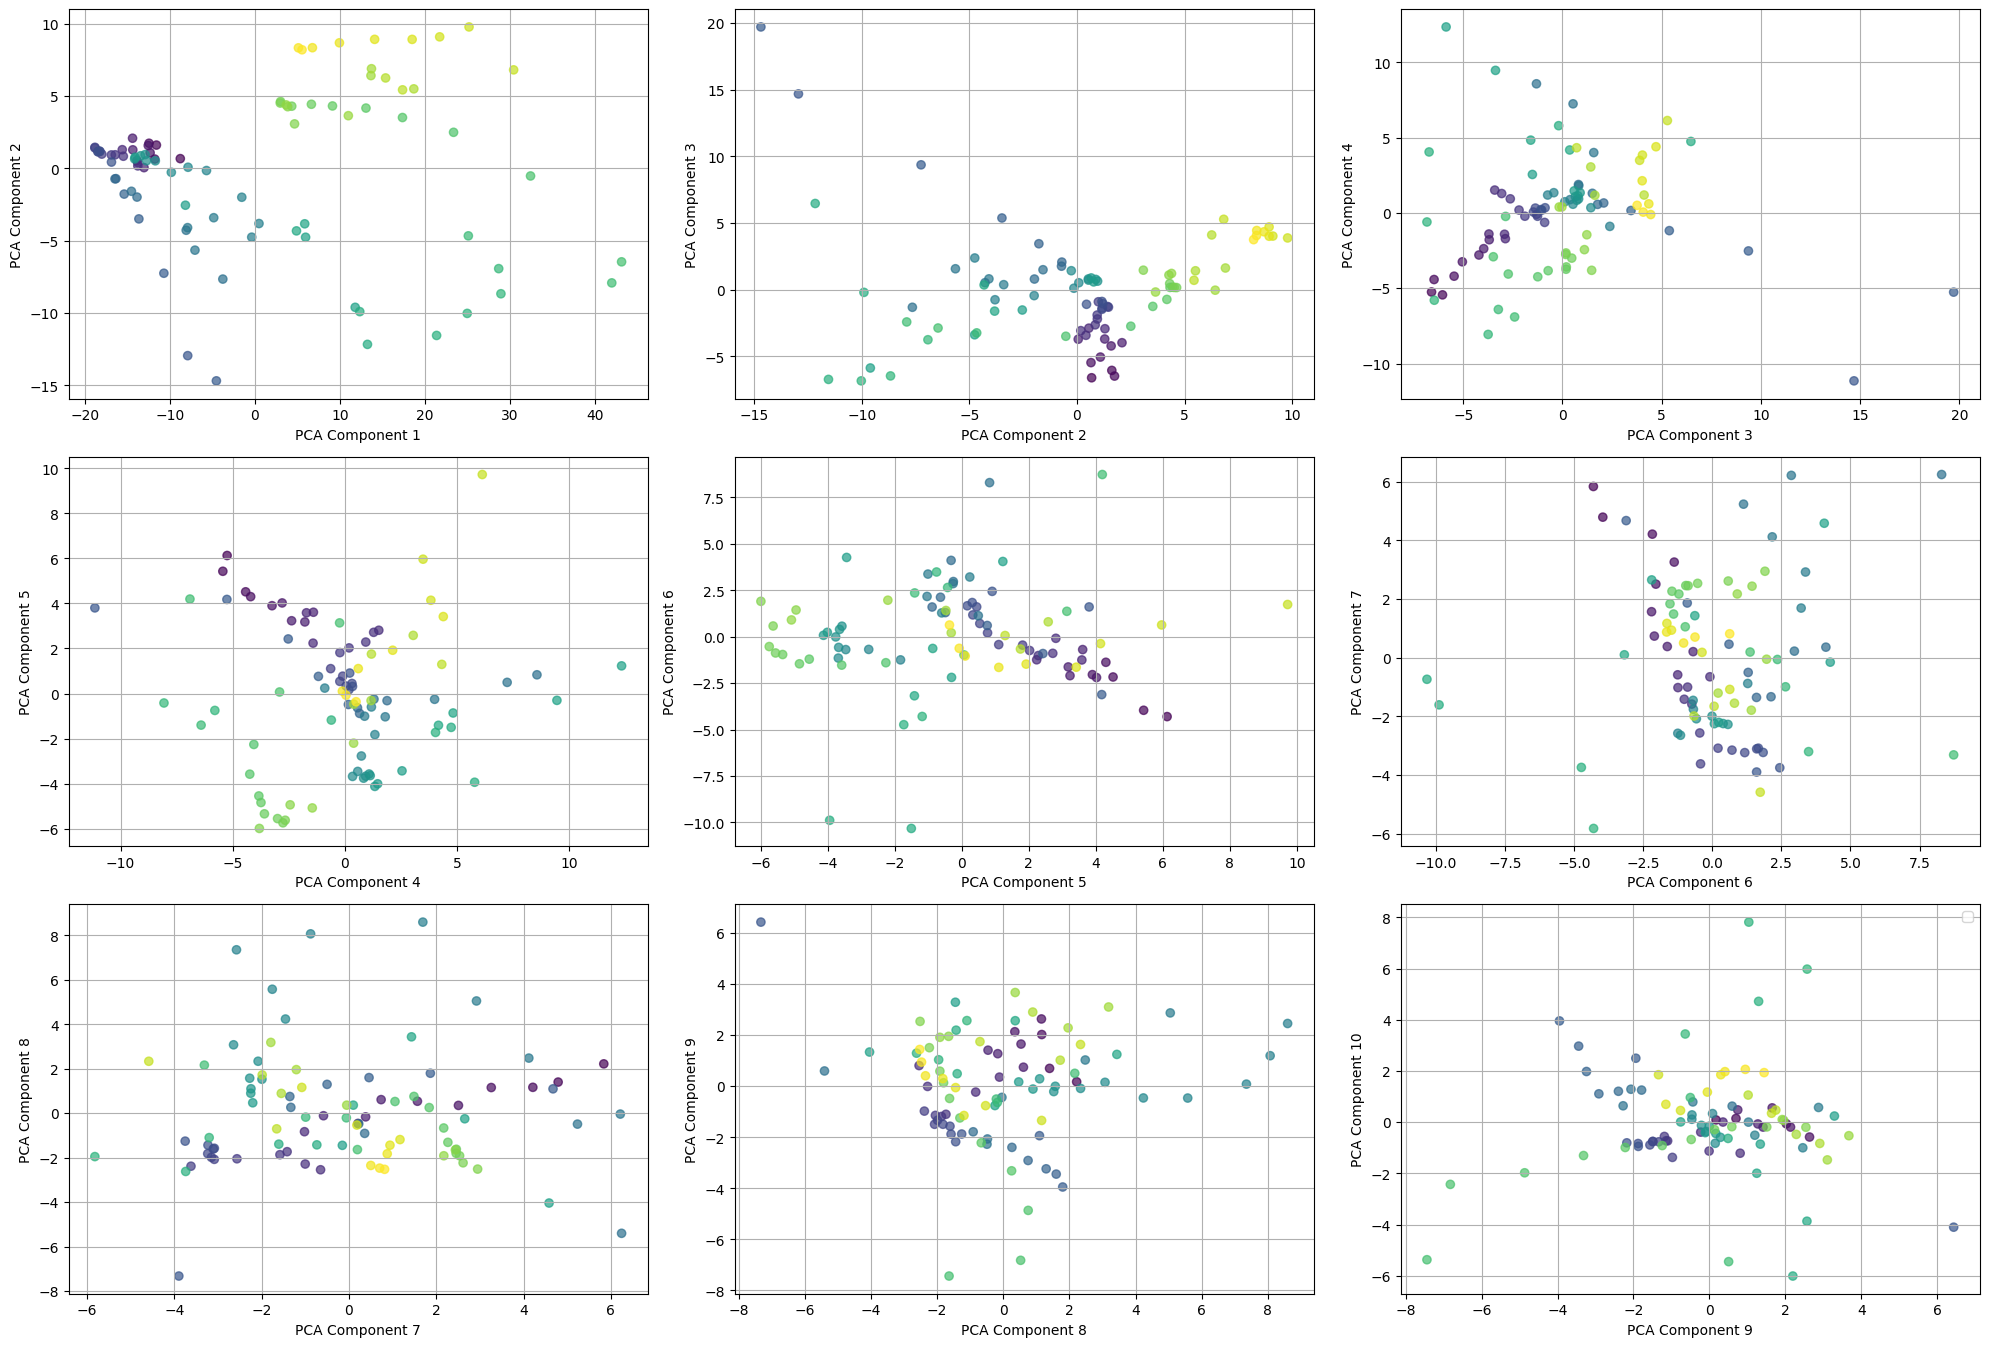

In [185]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [186]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.345
KMeans Davies-Bouldin Index is 1.304


<Axes: xlabel='k'>

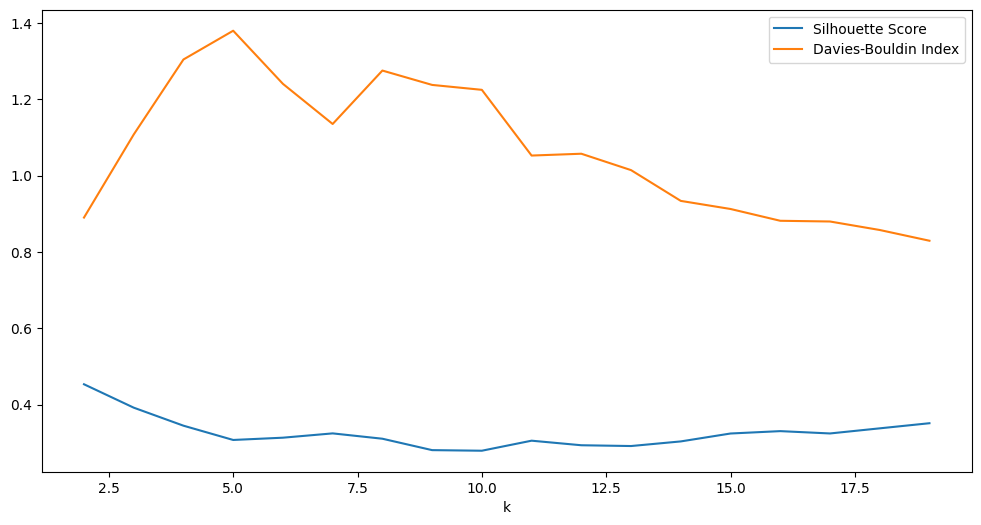

In [187]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     91               NaN   
1    0.76            3         0     91               NaN   
2    1.01            3         1     88               NaN   
3    1.27            3         1     87               NaN   
4    1.52            3         1     87               NaN   
5    1.78            3         1     87               NaN   
6    2.03            3         3     81         -0.295469   
7    2.29            3         4     74         -0.218007   
8    2.54            3         5     71         -0.201901   
9    2.80            3         6     66         -0.144966   
10   3.05            3         6     63         -0.104468   
11   3.31            3         7     54         -0.017167   
12   3.56            3         6     52          0.029061   
13   3.82            3         5     51         -0.008404   
14   4.07            3         5     49          0.013931   
15   4.33            3         5     48          0.026728   
16   4.58            3         5     46          0.037645   
17   4.84            3         5     43          0.064059   
18   5.09            3         5     42          0.060423   
19   5.35            3         5     41          0.070711   
20   5.60            3         6     37          0.083163   
21   5.86            3         6     30          0.116857   
22   6.11            3         5     30          0.143542   
23   6.37            3         5     29          0.149955   
24   6.62            3         6     25          0.150954   
25   6.88            3         6     23          0.167305   
26   7.13            3         6     22          0.163924   
27   7.39            3         5     22          0.161228   
28   7.64            3         5     22          0.161228   
29   7.90            3         5     20          0.159617   
30   8.15            3         4     20          0.284285   
31   8.41            3         4     20          0.284285   
32   8.66            3         5     16          0.299822   
33   8.92            3         5     16          0.299822   
34   9.17            3         6     13          0.294460   
35   9.43            3         5     13          0.296761   
36   9.68            3         4     12          0.303821   
37   9.94            3         4     12          0.303821   
38  10.19            3         4     12          0.303821   
39  10.45            3         4     12          0.303821   
40  10.70            3         4     11          0.296744   
41  10.96            3         4     11          0.296744   
42  11.21            3         4     11          0.296744   
43  11.47            3         4     11          0.296744   
44  11.72            3         4     11          0.296744   
45  11.98            3         4     11          0.296744   
46  12.23            3         4     10          0.293266   
47  12.49            3         3     10          0.286781   
48  12.74            3         3     10          0.286781   
49  13.00            3         3     10          0.286781   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5                    NaN  
6               1.608546  
7               1.475870  
8               1.512452  
9               1.483147  
10              1.469882  
11              1.366744  
12              1.418339  
13              1.532474  
14              1.490941  
15              1.482769  
16              1.520333  
17              1.472876  
18              1.542329  
19              1.510437  
20              1.462703  
21              1.464807  
22              1.594861  
23              1.590841  
24              1.593563  
25              1.615993  
26              1.646422  
27              1.647824  
28              1.647824  
29              1.604638  
30              1.668095  
31              1.668095  
32 

<Axes: xlabel='eps'>

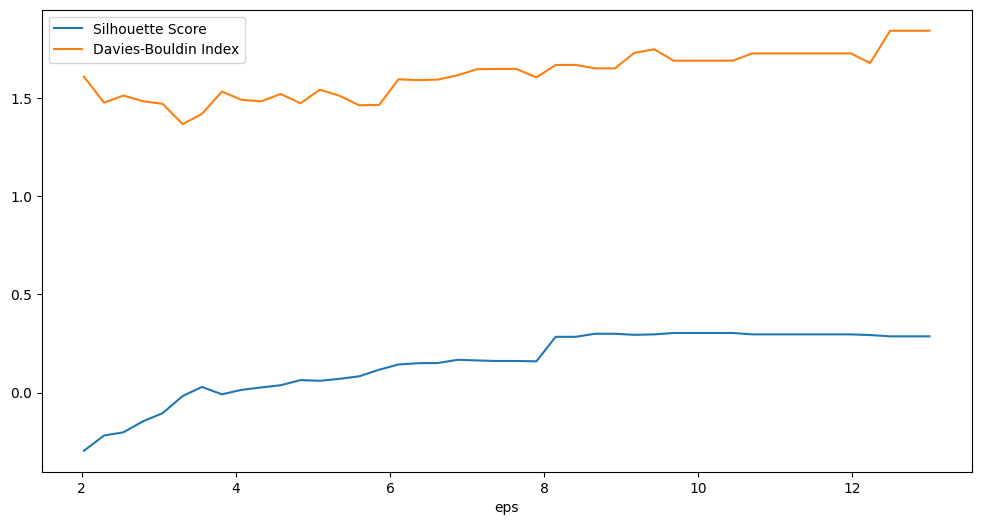

In [188]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

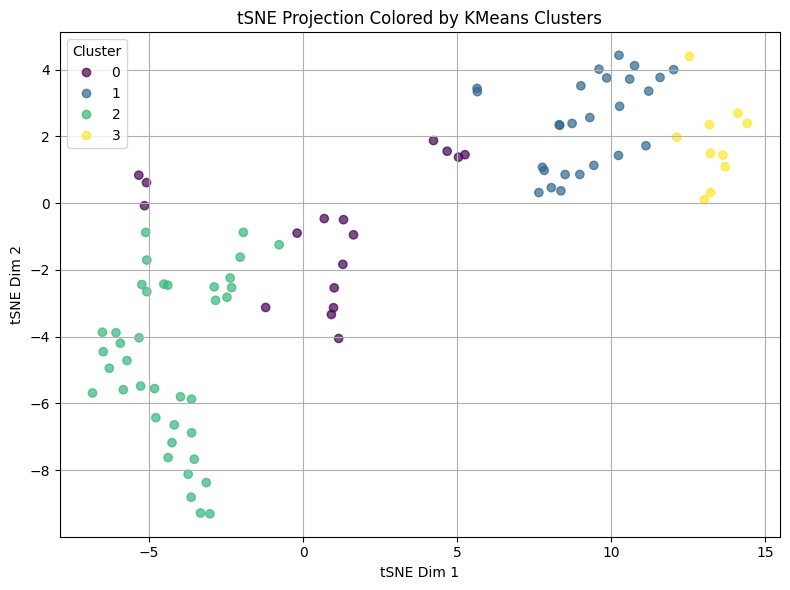

In [189]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  Davies-Bouldin Index
0   0.05            2        18    152          0.512848              0.521690
1   0.07            2        17    105          0.335238              0.649503
2   0.09            2        18     67          0.261523              0.837129
3   0.11            2        14     52          0.234190              0.810001
4   0.13            2         6     37         -0.146530              1.041485
5   0.15            2         3     33         -0.171294              1.664167
6   0.17            2         1     29               NaN                   NaN
7   0.19            2         4     19          0.253093              0.588482
8   0.21            2         3     18          0.406978              0.510728
9   0.22            2         3     17          0.403307              0.511546
10  0.24            2         3     14          0.397912              0.423019
11  0.26            2         2     13          0.741742              0.231127
12  0.28            2         3     10          0.269110              0.666412
13  0.30            2         3      9          0.264859              0.672926
14  0.32            2         2      9          0.736408              0.234625
15  0.34            2         2      8          0.732432              0.236770
16  0.36            2         2      8          0.732432              0.236770
17  0.38            2         2      7          0.730548              0.238110
18  0.40            2         2      7          0.730548              0.238110
19  0.42            2         3      5          0.728048              0.361045
20  0.44            2         3      4          0.723448              0.361797
21  0.46            2         3      4          0.723448              0.361797
22  0.48            2         3      4          0.723448              0.361797
23  0.50            2         3      4          0.723448              0.361797
24  0.52            2         3      4          0.723448              0.361797
25  0.53            2         3      3          0.721592              0.362244
26  0.55            2         3      3          0.721592              0.362244
27  0.57            2         2      3          0.756330              0.323915
28  0.59            2         2      3          0.756330              0.323915
29  0.61            2         2      3          0.756330              0.323915
30  0.63            2         2      3          0.756330              0.323915
31  0.65            2         2      3          0.756330              0.323915
32  0.67            2         2      3          0.756330              0.323915
33  0.69            2         2      3          0.756330              0.323915
34  0.71            2         1      3               NaN                   NaN
35  0.73            2         1      3               NaN                   NaN
36  0.75            2         1      3               NaN                   NaN
37  0.77            2         1      3               NaN                   NaN
38  0.79            2         1      3               NaN                   NaN
39  0.81            2         1      3               NaN                   NaN
40  0.83            2         1      3               NaN                   NaN
41  0.84            2         1      3               NaN                   NaN
42  0.86            2         1      3               NaN                   NaN
43  0.88            2         1      3               NaN                   NaN
44  0.90            2         1      3               NaN                   NaN
45  0.92            2         1      3               NaN                   NaN
46  0.94            2         1      3               NaN                   NaN
47  0.96            2         1      3               NaN                   NaN
48  0.98            2         1      3               NaN                   NaN
49  1.00            2         1      3               Na

<Axes: xlabel='eps'>

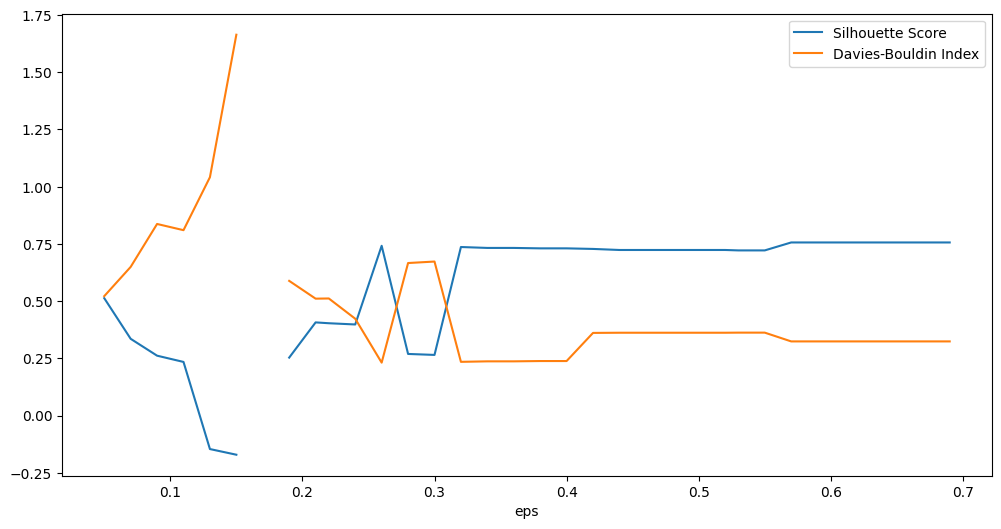

In [190]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 50)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [191]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [192]:
season = 4
season_year = 2020
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2020-12-01 to 2021-02-28
Columns: 378 entries, 10000009 to 9000451
dtypes: float64(378)
memory usage: 266.5 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2020-12-01  1.040660  0.698647  0.308321  1.020134  0.653809  0.664843   
2020-12-02  1.011030  0.656893  0.297517  0.963581  0.613201  0.631111   
2020-12-03  0.971921  0.648748  0.291726  0.942425  0.605208  0.624471   
2020-12-04  0.945178  0.644384  0.278935  0.923524  0.592498  0.613913   
2020-12-05  0.921371  0.662701  0.283482  0.911818  0.609955  0.628414   
...              ...       ...       ...       ...       ...       ...   
2021-02-24  1.126778  0.740154  0.602982  1.148083  0.664510  0.707382   
2021-02-25  1.163685  0.747230  0.704056  1.155215  0.689145  0.728224   
2021-02-26  1.133020  0.724289  0.682662  1.101492  0.659912  0.703492   
2021-02-27  1.055115  0.703628  0.572381  1.034454  0.628481  0.676902   
2021-02-28  1.011529  0.686701  0.522690  1.005955  0.613723  0.664417   

             1000102   1000315  11000011  11000016  ...  67000019  67000030  \
2020-12-01  1.124624  1.083178  

          2020-12-01  2020-12-02  2020-12-03  2020-12-04  2020-12-05  \
10000009   -0.021955   -0.022390   -0.025032   -0.026464   -0.027648   
10000010   -0.053084   -0.054693   -0.054552   -0.054144   -0.051455   
10000011   -0.088611   -0.087473   -0.087165   -0.087775   -0.086357   
10000014   -0.023824   -0.026718   -0.027726   -0.028457   -0.028527   
10000016   -0.057166   -0.058678   -0.058530   -0.058919   -0.056310   
...              ...         ...         ...         ...         ...   
9000015     0.025602    0.028285    0.027752    0.041376    0.038307   
9000172     0.001720   -0.003595    0.003957    0.003062    0.003187   
9000173     0.015638   -0.010612   -0.035009   -0.004757    0.000700   
9000293    -0.025627   -0.027510   -0.021610   -0.012272    0.014643   
9000451    -0.032859   -0.037351   -0.039450   -0.037335   -0.030242   

          2020-12-06  2020-12-07  2020-12-08  2020-12-09  2020-12-10  ...  \
10000009   -0.029226   -0.029796   -0.029583   -0.029604  

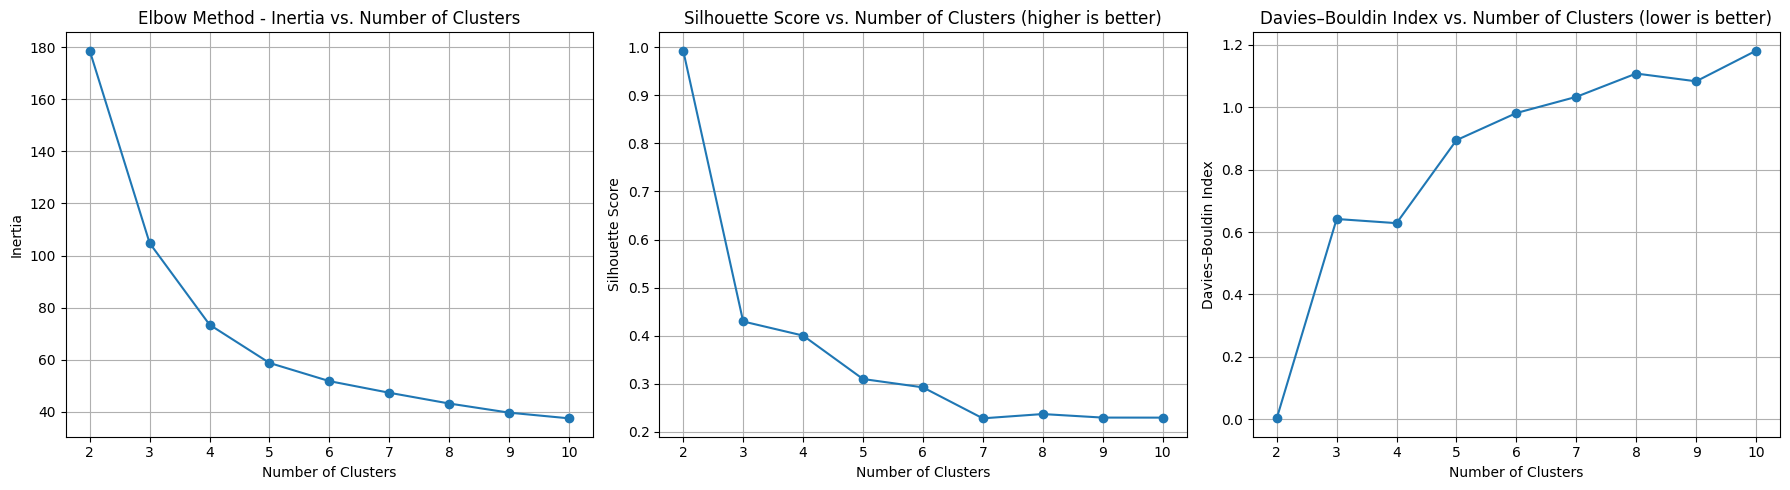

In [193]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        2
10000011        2
10000014        2
10000016        2

            10000009  10000010  10000011  10000014  10000016  10000017  \
2020-12-01  1.040660  0.698647  0.308321  1.020134  0.653809  0.664843   
2020-12-02  1.011030  0.656893  0.297517  0.963581  0.613201  0.631111   
2020-12-03  0.971921  0.648748  0.291726  0.942425  0.605208  0.624471   
2020-12-04  0.945178  0.644384  0.278935  0.923524  0.592498  0.613913   
2020-12-05  0.921371  0.662701  0.283482  0.911818  0.609955  0.628414   
...              ...       ...       ...       ...       ...       ...   
2021-02-24  1.126778  0.740154  0.602982  1.148083  0.664510  0.707382   
2021-02-25  1.163685  0.747230  0.704056  1.155215  0.689145  0.728224   
2021-02-26  1.133020  0.724289  0.682662  1.101492  0.659912  0.703492   
2021-02-27  1.055115  0.703628  0.572381  1.034454  0.628481  0.676902   
2021-02-28  1.011529  0.686701  0.522690  1.005955  0.613723  0.664417   

             1000102   1000315  11000011  11000016  ...  67000019  67000030  \
2020-12-01  1.124624  1.083178  

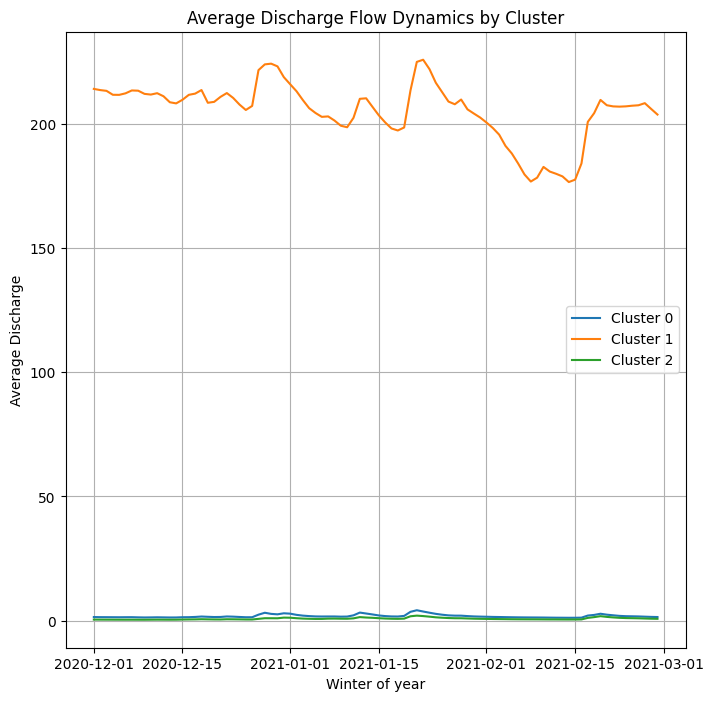

In [194]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [195]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [196]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2020-12-01  1.040660  0.698647  0.308321  1.020134  0.653809  0.664843   
2020-12-02  1.011030  0.656893  0.297517  0.963581  0.613201  0.631111   
2020-12-03  0.971921  0.648748  0.291726  0.942425  0.605208  0.624471   
2020-12-04  0.945178  0.644384  0.278935  0.923524  0.592498  0.613913   
2020-12-05  0.921371  0.662701  0.283482  0.911818  0.609955  0.628414   
...              ...       ...       ...       ...       ...       ...   
2021-02-24  1.126778  0.740154  0.602982  1.148083  0.664510  0.707382   
2021-02-25  1.163685  0.747230  0.704056  1.155215  0.689145  0.728224   
2021-02-26  1.133020  0.724289  0.682662  1.101492  0.659912  0.703492   
2021-02-27  1.055115  0.703628  0.572381  1.034454  0.628481  0.676902   
2021-02-28  1.011529  0.686701  0.522690  1.005955  0.613723  0.664417   

             1000102   1000315  11000011  11000016  ...  67000019  67000030  \
2020-12-01  1.124624  1.083178  1.761815  1.304680  ...  0.640686  0.194713   
2020-12-02  1.106274  1.067228  1.715524  1.236071  ...  0.592033  0.169202   
2020-12-03  1.006194  0.980235  1.662321  1.216655  ...  0.564146  0.161108   
2020-12-04  0.869943  0.861803  1.660280  1.280318  ...  0.564382  0.184094   
2020-12-05  0.786023  0.788858  1.646119  1.443137  ...  0.546342  0.175180   
...              ...       ...       ...       ...  ...       ...       ...   
2021-02-24  1.017742  0.990273  1.967413  2.032218  ...  5.031765  1.035287   
2021-02-25  1.074206  1.039354  1.971102  1.984857  ...  4.396328  0.687869   
2021-02-26  1.098523  1.060490  1.965801  1.877008  ...  3.743934  0.447365   
2021-02-27  1.083285  1.047245  1.936096  1.747077  ...  2.995580  0.321645   
2021-02-28  1.052815  1.020760  1.888337  1.604674  ...  2.455830  0.259825   

             7000003   7000333   8000001   9000015   9000172   9000173  \
2020-12-01  0.954600  0.721534  1.028947  1.563174  1.300777  1.453701   
2020-12-02  0.885728  0.699395  1.075277  1.566591  1.217089  1.140159   
2020-12-03  0.810724  0.668465  1.073085  1.549772  1.289278  0.862694   
2020-12-04  0.727063  0.634070  0.984356  1.682367  1.266022  1.181062   
2020-12-05  0.698850  0.635284  0.927452  1.637987  1.256398  1.229385   
...              ...       ...       ...       ...       ...       ...   
2021-02-24  1.261213  0.866802  1.455950  1.894587  1.157357  0.758208   
2021-02-25  1.349541  0.913826  1.523403  2.091825  1.175912  0.709441   
2021-02-26  1.390946  0.906763  1.528145  2.189270  1.135900  0.657068   
2021-02-27  1.323571  0.862742  1.487671  1.968012  1.088480  0.814108   
2021-02-28  1.263521  0.838438  1.464213  1.834011  1.061759  1.411861   

             9000293   9000451  
2020-12-01  1.000324  0.920858  
2020-12-02  0.954898  0.847015  
2020-12-03  1.009385  0.814079  
2020-12-04  1.099396  0.827042  
2020-12-05  1.380880  0.893189  
...              ...       ...  
2021-02-24  1.402856  1.717383  
2021-02-25  1.392362  1.598226  
2021-02-26  1.260537  1.396766  
2021-02-27  1.120669  1.250653  
2021-02-28  1.058588  1.154612  

[90 rows x 378 columns]

<Axes: >

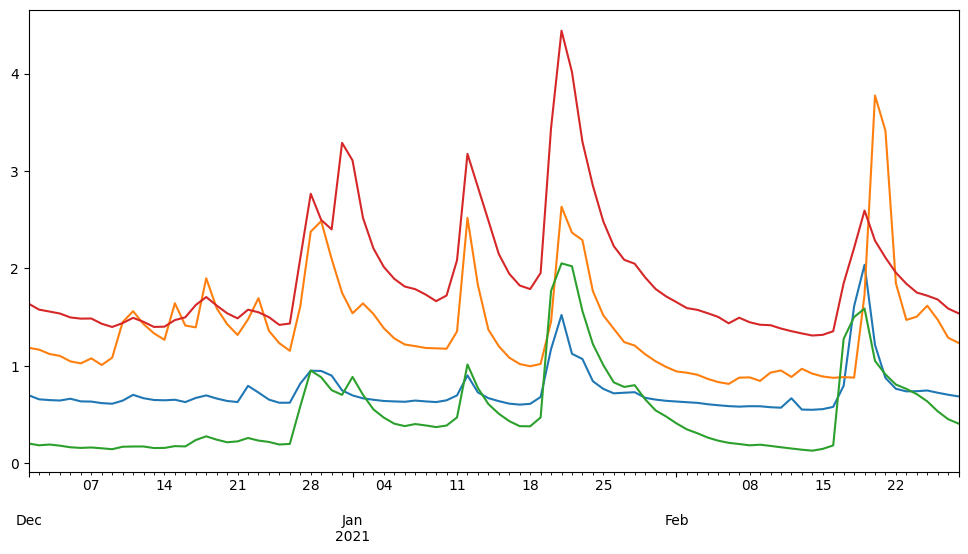

In [197]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

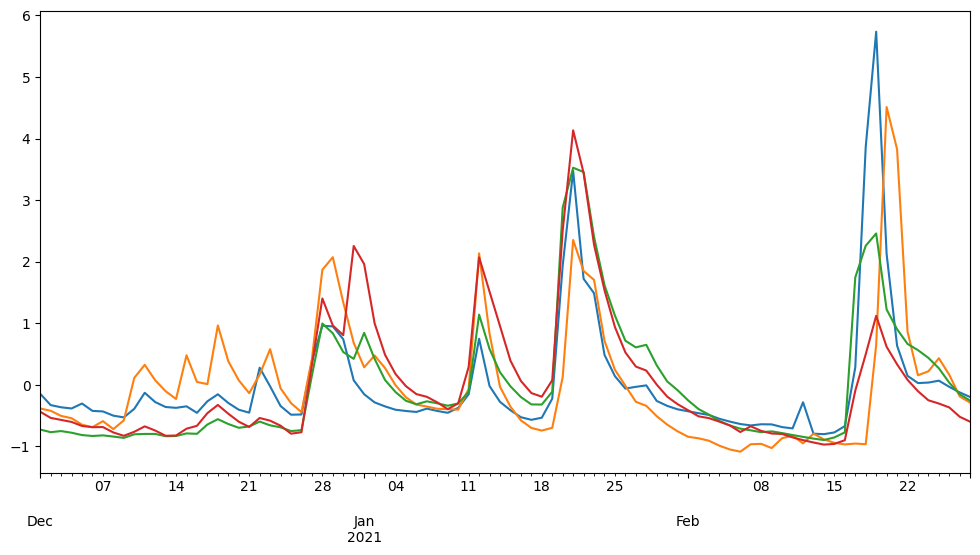

In [198]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

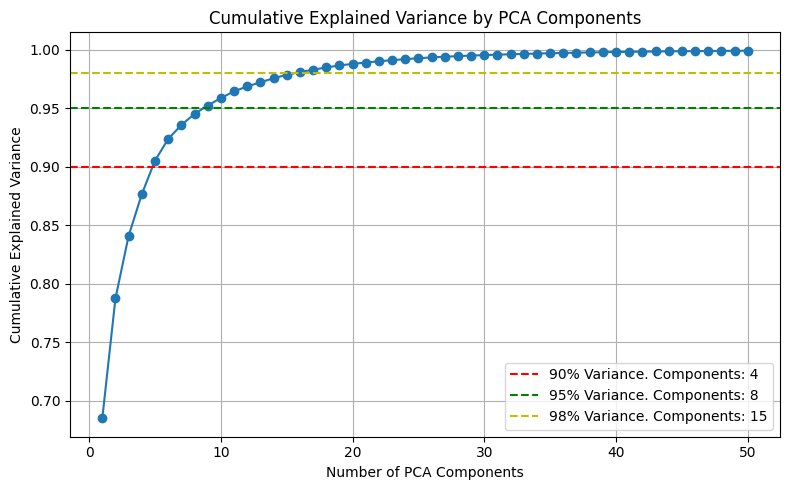

In [199]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [200]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-13.61063783,   6.03650149,  -0.19952556, ...,   0.27330989,
          0.15600586,  -0.47717092],
       [-14.39641226,   5.07479994,  -0.17273457, ...,   0.11359208,
          0.83072032,  -0.59324229],
       [-14.84213312,   5.53813638,  -0.03714965, ...,  -0.02930502,
          0.46148602,  -0.56656618],
       ...,
       [  1.08389289,  -7.92102164,  -3.01217151, ...,   0.3373567 ,
          0.09102137,   0.07866199],
       [ -2.06005866,  -7.17549813,  -2.5393209 , ...,   0.3853359 ,
         -0.36917673,   0.27634073],
       [ -3.92079469,  -6.77257427,  -2.47433712, ...,   0.41678203,
         -0.44575245,   0.24978769]], shape=(90, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_41832\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


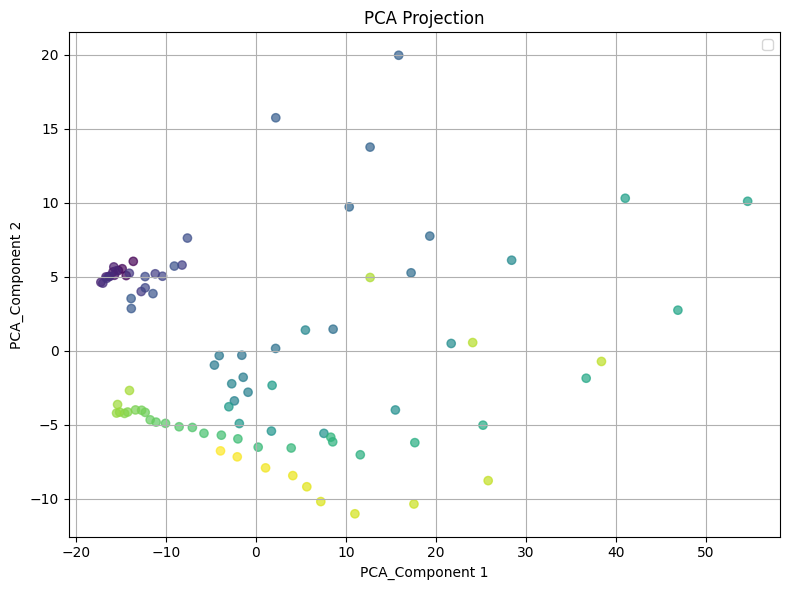

In [201]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_41832\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


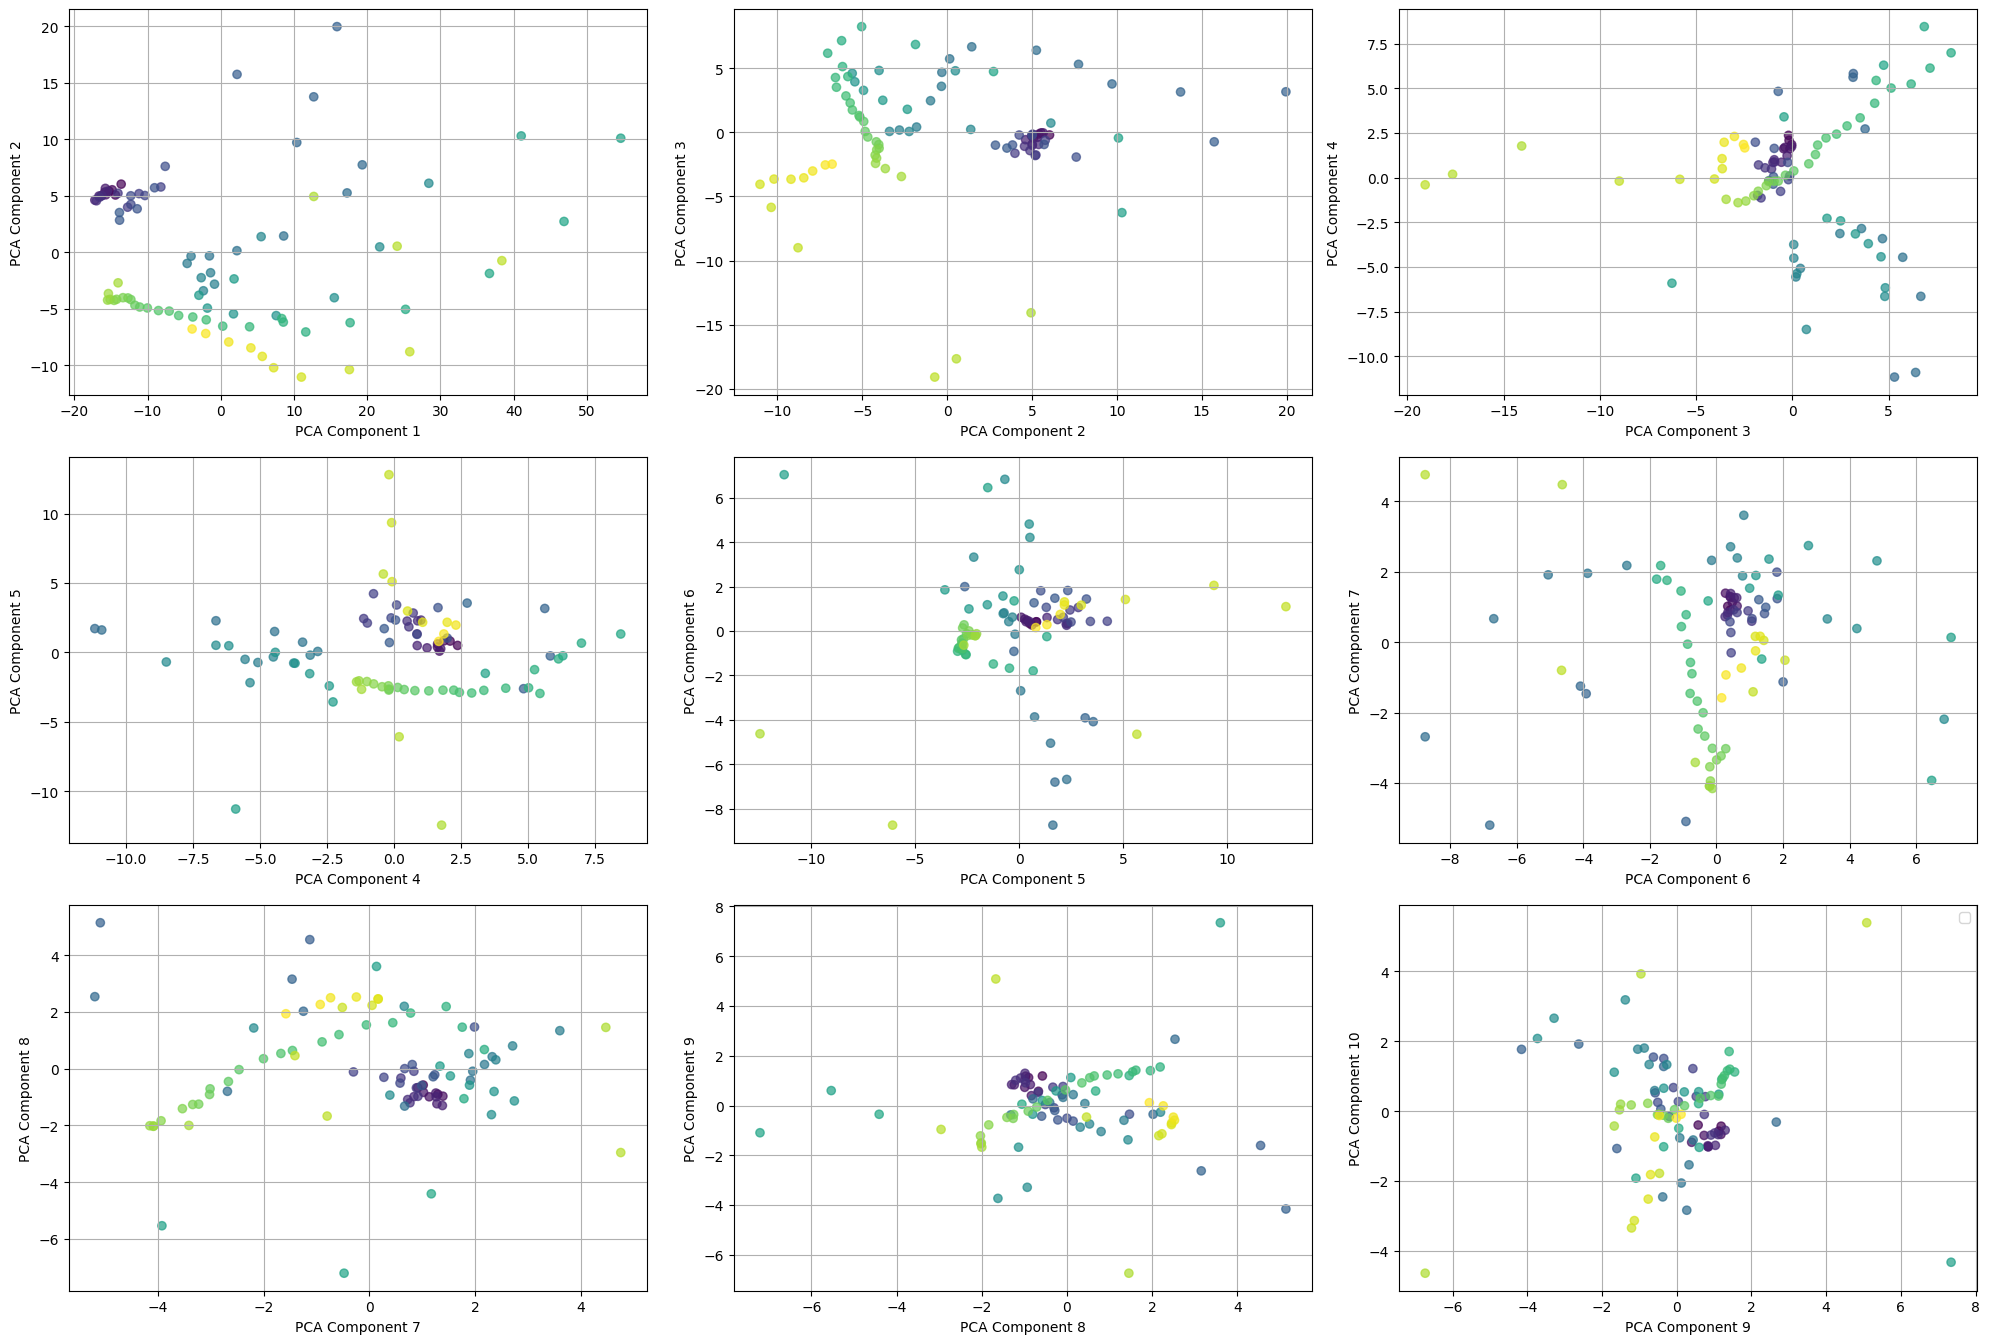

In [202]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [203]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.378
KMeans Davies-Bouldin Index is 1.141


<Axes: xlabel='k'>

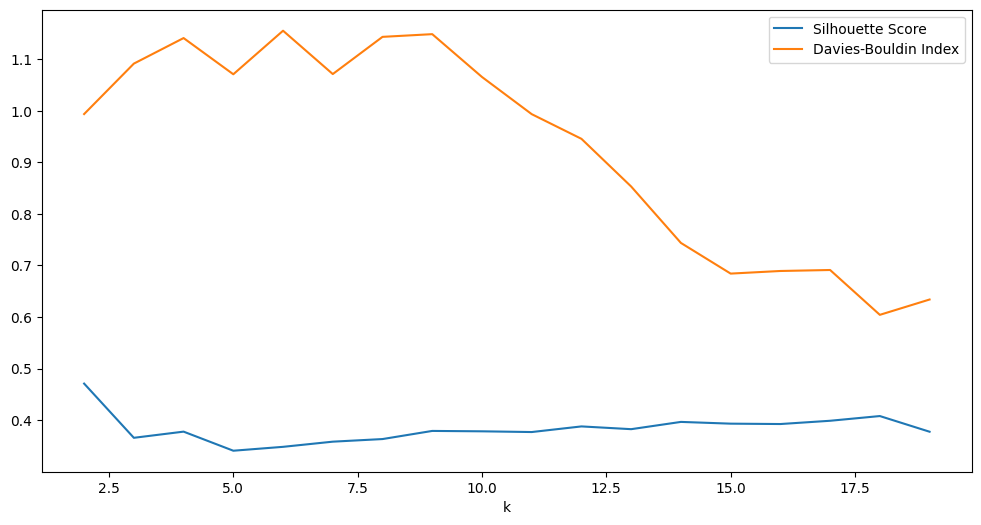

In [204]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     90               NaN   
1    0.76            3         0     90               NaN   
2    1.01            3         1     87               NaN   
3    1.27            3         4     73         -0.081950   
4    1.52            3         4     71         -0.057743   
5    1.78            3         4     65         -0.040388   
6    2.03            3         3     62          0.009684   
7    2.29            3         2     60          0.100422   
8    2.54            3         3     56          0.103963   
9    2.80            3         5     49          0.011851   
10   3.05            3         6     46          0.024722   
11   3.31            3         6     45          0.034756   
12   3.56            3         5     37          0.173254   
13   3.82            3         5     34          0.234969   
14   4.07            3         7     27          0.257427   
15   4.33            3         7     27          0.257427   
16   4.58            3         7     26          0.266120   
17   4.84            3         6     25          0.238868   
18   5.09            3         6     24          0.251200   
19   5.35            3         6     24          0.251200   
20   5.60            3         6     24          0.251200   
21   5.86            3         5     23          0.259617   
22   6.11            3         4     23          0.287072   
23   6.37            3         4     23          0.287072   
24   6.62            3         4     22          0.292409   
25   6.88            3         4     21          0.281596   
26   7.13            3         2     21          0.302449   
27   7.39            3         2     21          0.302449   
28   7.64            3         2     21          0.302449   
29   7.90            3         2     20          0.302847   
30   8.15            3         2     20          0.302847   
31   8.41            3         2     19          0.289882   
32   8.66            3         2     19          0.289882   
33   8.92            3         2     18          0.295058   
34   9.17            3         2     17          0.291445   
35   9.43            3         2     15          0.282210   
36   9.68            3         1     15               NaN   
37   9.94            3         1     15               NaN   
38  10.19            3         1     15               NaN   
39  10.45            3         1     15               NaN   
40  10.70            3         1     14               NaN   
41  10.96            3         1     14               NaN   
42  11.21            3         1     14               NaN   
43  11.47            3         2     11          0.346609   
44  11.72            3         2     11          0.346609   
45  11.98            3         2     11          0.346609   
46  12.23            3         2      8          0.325378   
47  12.49            3         2      8          0.325378   
48  12.74            3         2      8          0.325378   
49  13.00            3         2      7          0.310808   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               0.949768  
4               0.922835  
5               0.934502  
6               1.085794  
7               1.098362  
8               1.011915  
9               1.330245  
10              1.208654  
11              1.203722  
12              1.114809  
13              1.087530  
14              1.088829  
15              1.088829  
16              1.077465  
17              1.092796  
18              1.078759  
19              1.078759  
20              1.078759  
21              1.163930  
22              1.212150  
23              1.212150  
24              1.194846  
25              1.291451  
26              1.058927  
27              1.058927  
28              1.058927  
29              1.056924  
30              1.056924  
31              1.088846  
32 

<Axes: xlabel='eps'>

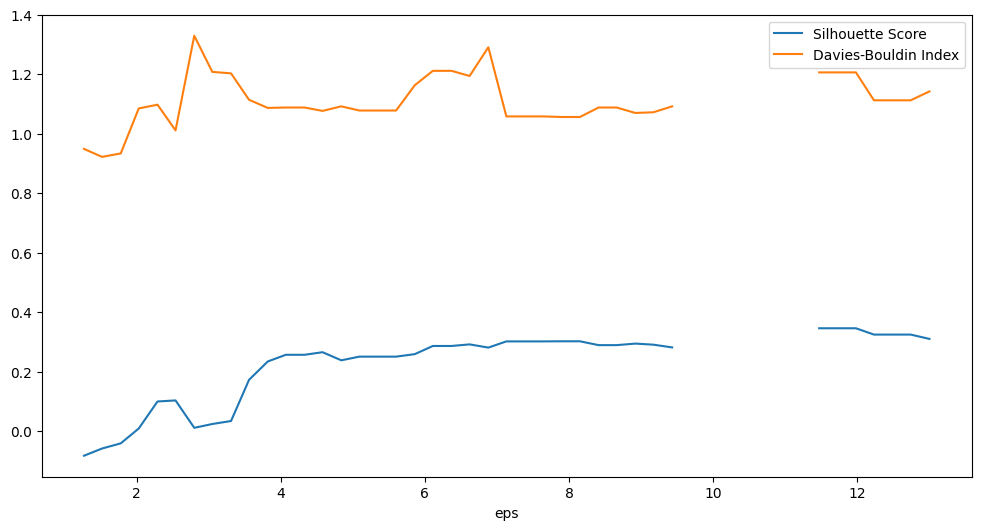

In [205]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

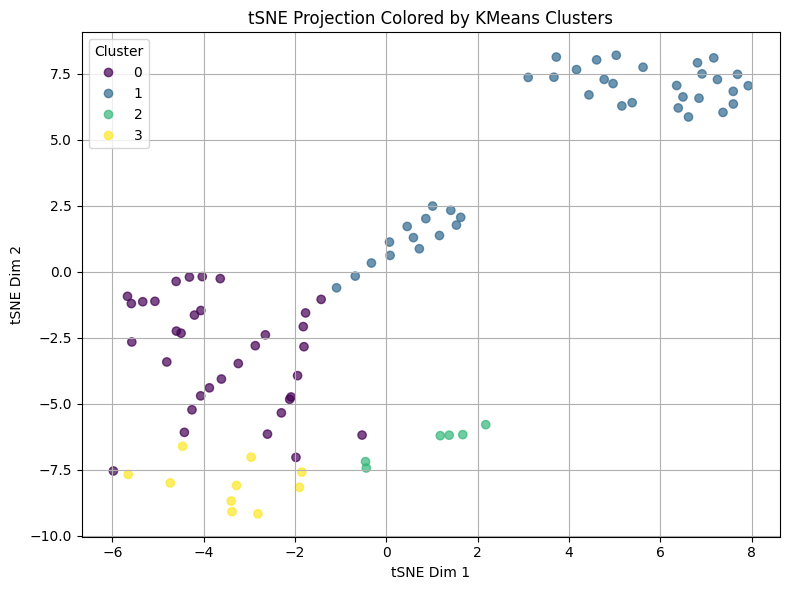

In [206]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        23    321          0.666085   
1    0.05            2        26    313          0.656955   
2    0.06            2        29    301          0.607279   
3    0.06            2        34    279          0.517845   
4    0.07            2        34    260          0.459691   
..    ...          ...       ...    ...               ...   
195  0.98            2         1      2               NaN   
196  0.99            2         1      2               NaN   
197  0.99            2         1      2               NaN   
198  1.00            2         1      2               NaN   
199  1.00            2         1      2               NaN   

     Davies-Bouldin Index  
0                0.375736  
1                0.380089  
2                0.430218  
3                0.519517  
4                0.566504  
..                    ...  
195                   NaN  
196                   NaN  
197                   NaN  
198                   NaN  
199                   NaN  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

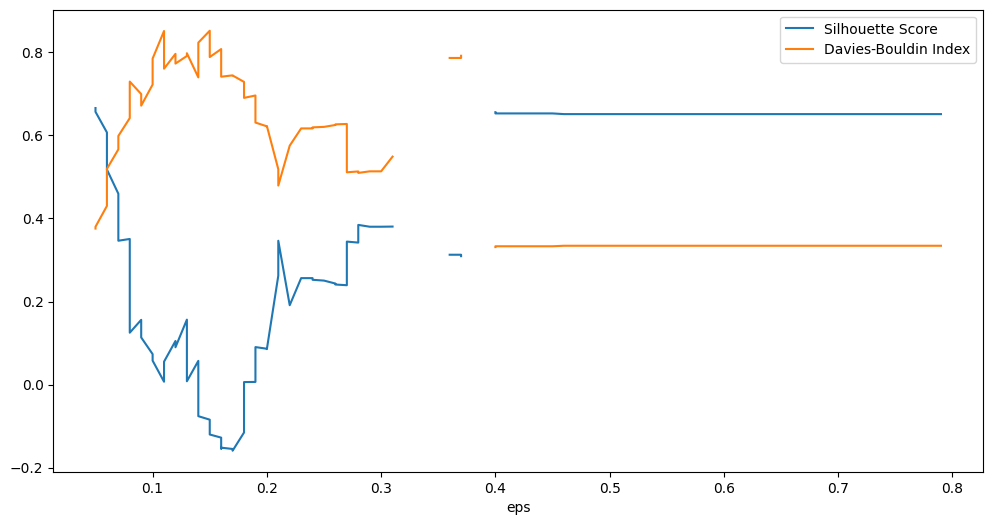

In [207]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))